In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import math
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
from keras import losses
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Dense, Dropout
from keras.models import Model, Sequential 
from tensorflow.keras.optimizers import Adam # for ADAM
from tensorflow.keras.optimizers import SGD # for Stochastic Gradient Descent
from tensorflow.keras.optimizers import RMSprop # for RMSprop
from tensorflow.keras.optimizers import Adagrad # for Adagrad
from tensorflow.keras.optimizers import Adadelta # for Adadelta
from keras import optimizers
from keras import backend as K
from keras.callbacks import Callback
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train=pd.read_csv('/content/drive/MyDrive/Major/train.csv')

In [5]:
test=pd.read_csv('/content/drive/MyDrive/Major/test.csv')


In [6]:
submission=pd.read_csv('/content/drive/MyDrive/Major/sample_submission.csv')

# Data Exploration

Total Attributes/Columns

In [7]:
train.shape

(59381, 128)

In [8]:
test.shape

(19765, 127)

In [9]:
train.describe()

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,...,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,39507.211515,1.026355,24.415655,0.328952,2.006955,2.673599,1.043583,0.405567,0.707283,0.292587,...,0.056954,0.010054,0.045536,0.010710,0.007528,0.013691,0.008488,0.019905,0.054496,5.636837
std,22815.883089,0.160191,5.072885,0.282562,0.083107,0.739103,0.291949,0.197190,0.074239,0.089037,...,0.231757,0.099764,0.208479,0.102937,0.086436,0.116207,0.091737,0.139676,0.226995,2.456833
min,2.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,19780.000000,1.000000,26.000000,0.076923,2.000000,3.000000,1.000000,0.238806,0.654545,0.225941,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,39487.000000,1.000000,26.000000,0.230769,2.000000,3.000000,1.000000,0.402985,0.709091,0.288703,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
75%,59211.000000,1.000000,26.000000,0.487179,2.000000,3.000000,1.000000,0.567164,0.763636,0.345188,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
max,79146.000000,2.000000,38.000000,1.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


In [10]:
test.describe()

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
count,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,...,19765.000000,19765.000000,19765.00000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000
mean,39772.653883,1.024994,24.321730,0.324381,2.006527,2.655755,1.043410,0.414901,0.705846,0.292557,...,0.013964,0.057324,0.01108,0.045231,0.010068,0.008247,0.013559,0.008601,0.018315,0.056312
std,22942.157493,0.156110,5.184879,0.279439,0.080526,0.754993,0.291445,0.200997,0.074497,0.090343,...,0.117345,0.232466,0.10468,0.207817,0.099837,0.090440,0.115655,0.092345,0.134092,0.230528
min,1.000000,1.000000,2.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.345455,0.083682,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19792.000000,1.000000,26.000000,0.076923,2.000000,3.000000,1.000000,0.253731,0.654545,0.225941,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39898.000000,1.000000,26.000000,0.230769,2.000000,3.000000,1.000000,0.417910,0.709091,0.288703,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,59758.000000,1.000000,26.000000,0.487179,2.000000,3.000000,1.000000,0.582090,0.763636,0.345188,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,79129.000000,2.000000,37.000000,1.000000,3.000000,3.000000,3.000000,0.970149,1.000000,0.878661,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
submission.describe()

,Id,Response
count,19765.000000,19765.0
mean,39772.653883,8.0
std,22942.157493,0.0
min,1.000000,8.0
25%,19792.000000,8.0
50%,39898.000000,8.0
75%,59758.000000,8.0
max,79129.000000,8.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


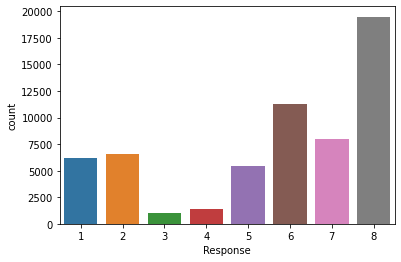

In [12]:
sn.countplot(train['Response']);

## Visualising Categorical Attributes

Seperating Categorical and Numerical Variables

In [13]:
categorical =  [col for col in train.columns if train[col].dtype =='object']

numerical = categorical =  [col for col in train.columns if train[col].dtype !='object']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


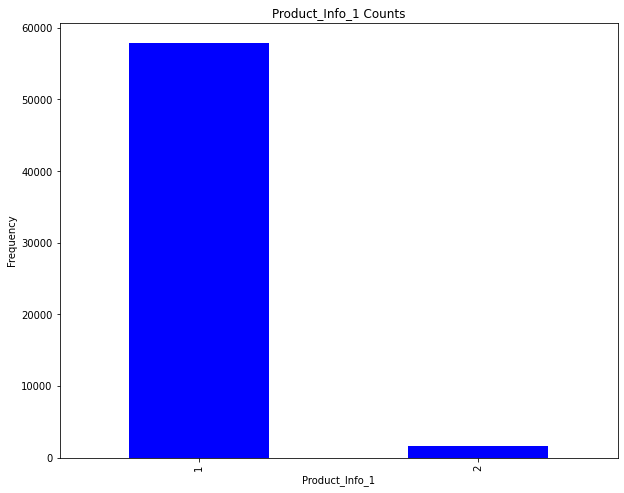

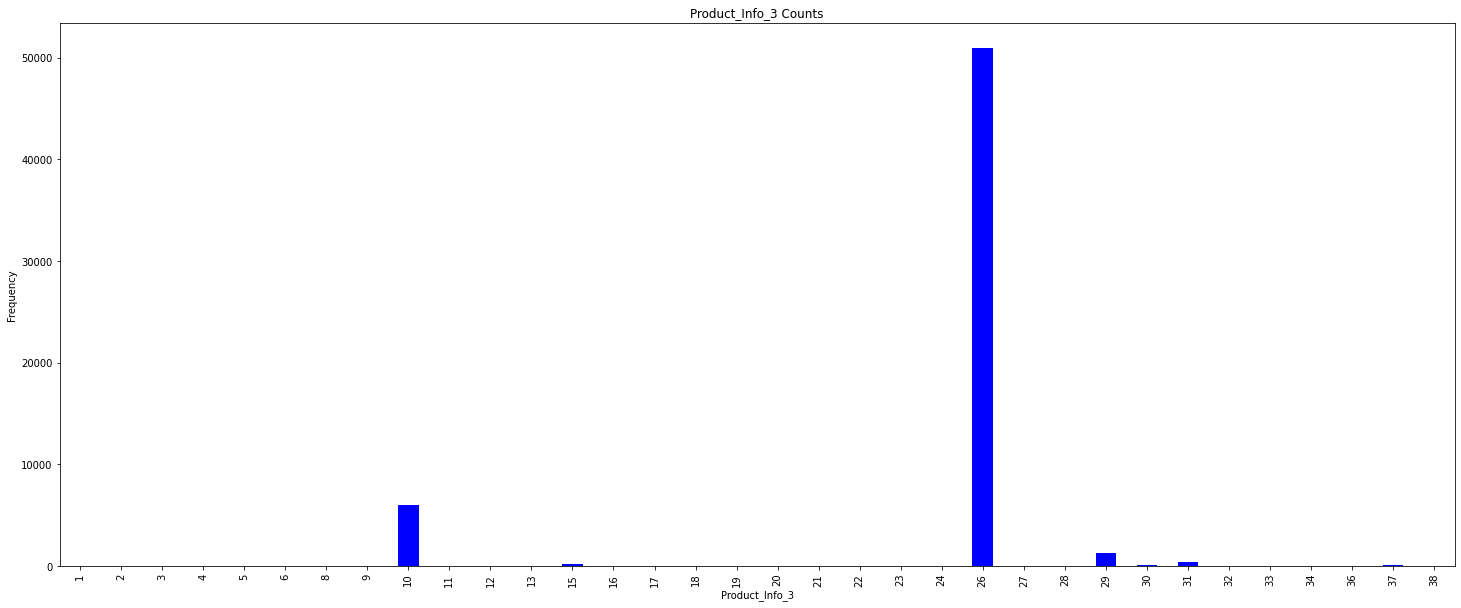

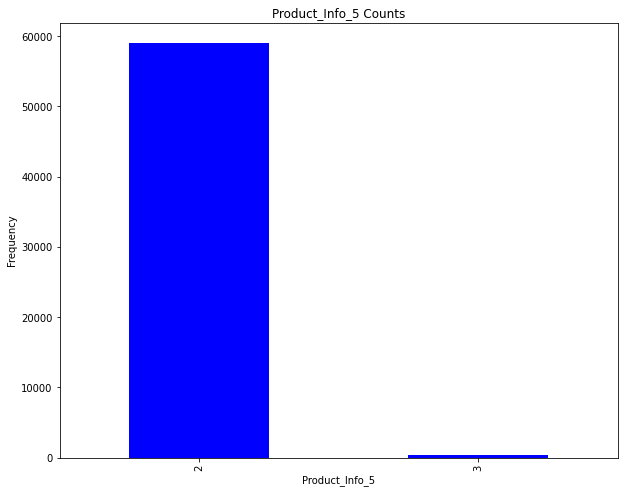

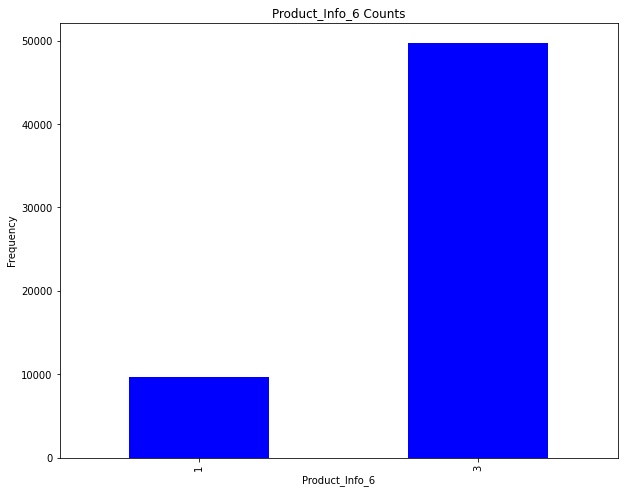

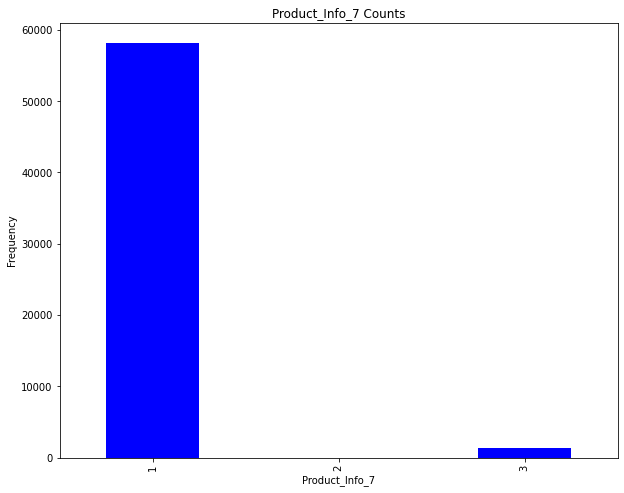

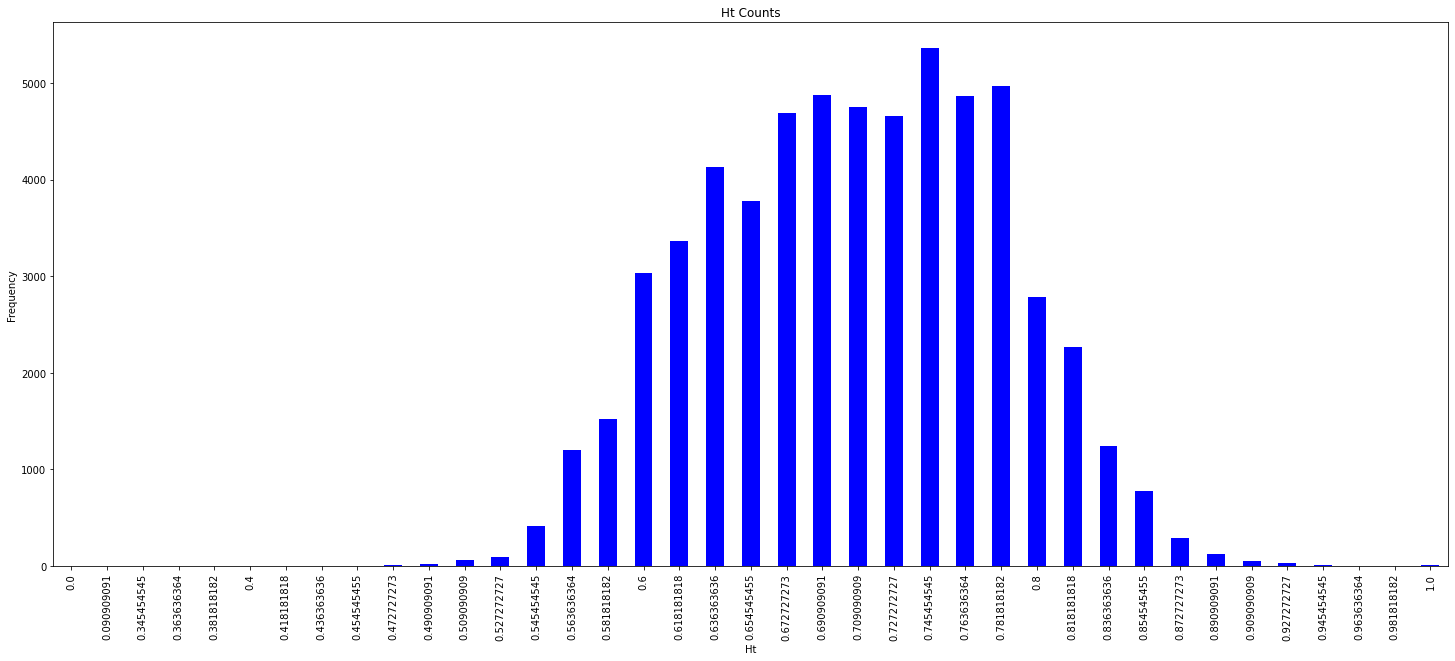

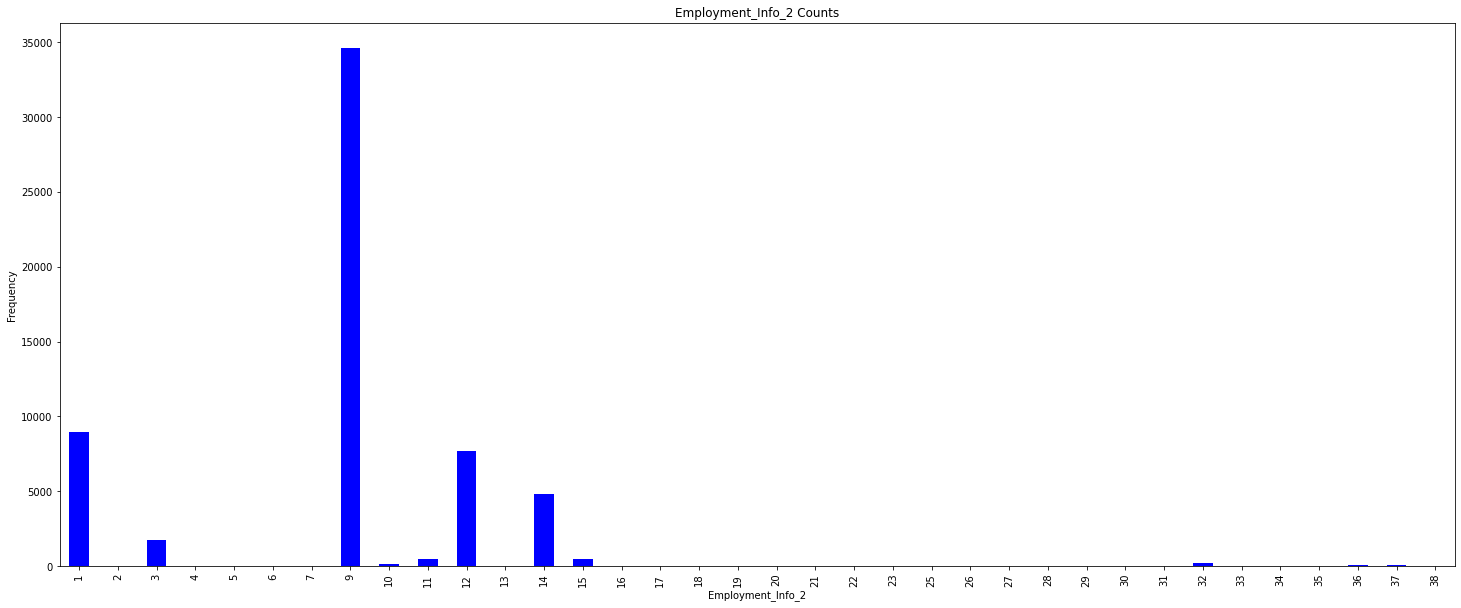

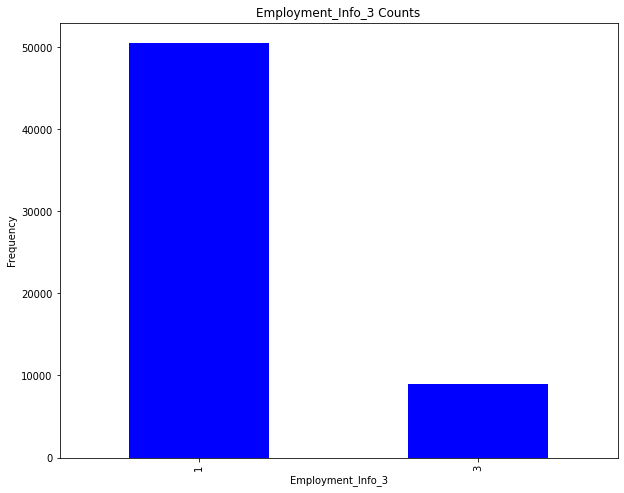

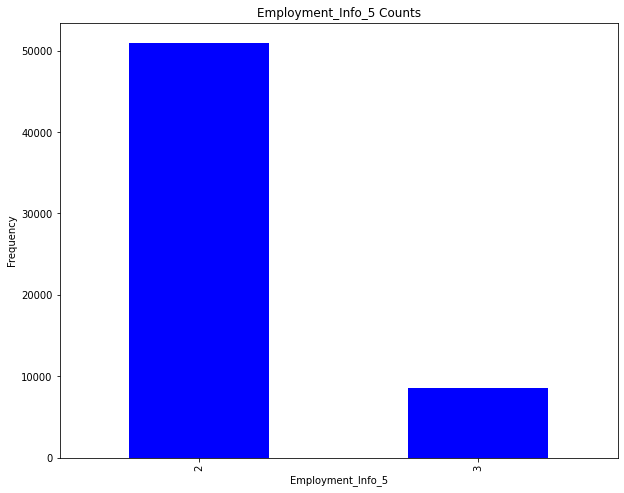

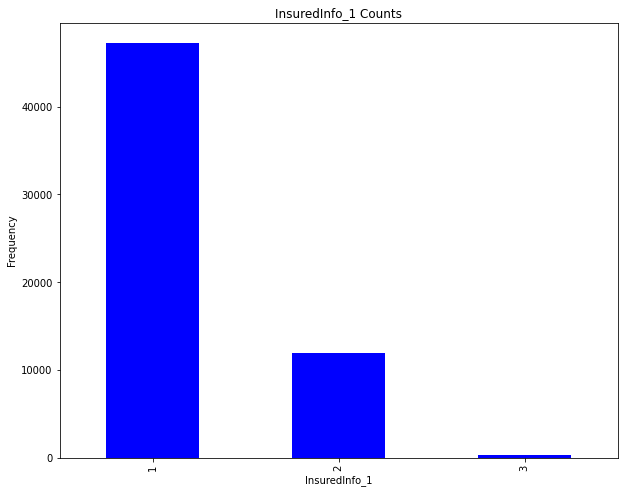

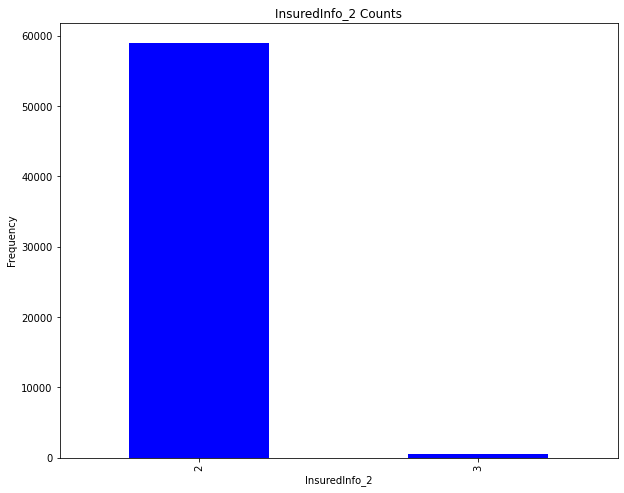

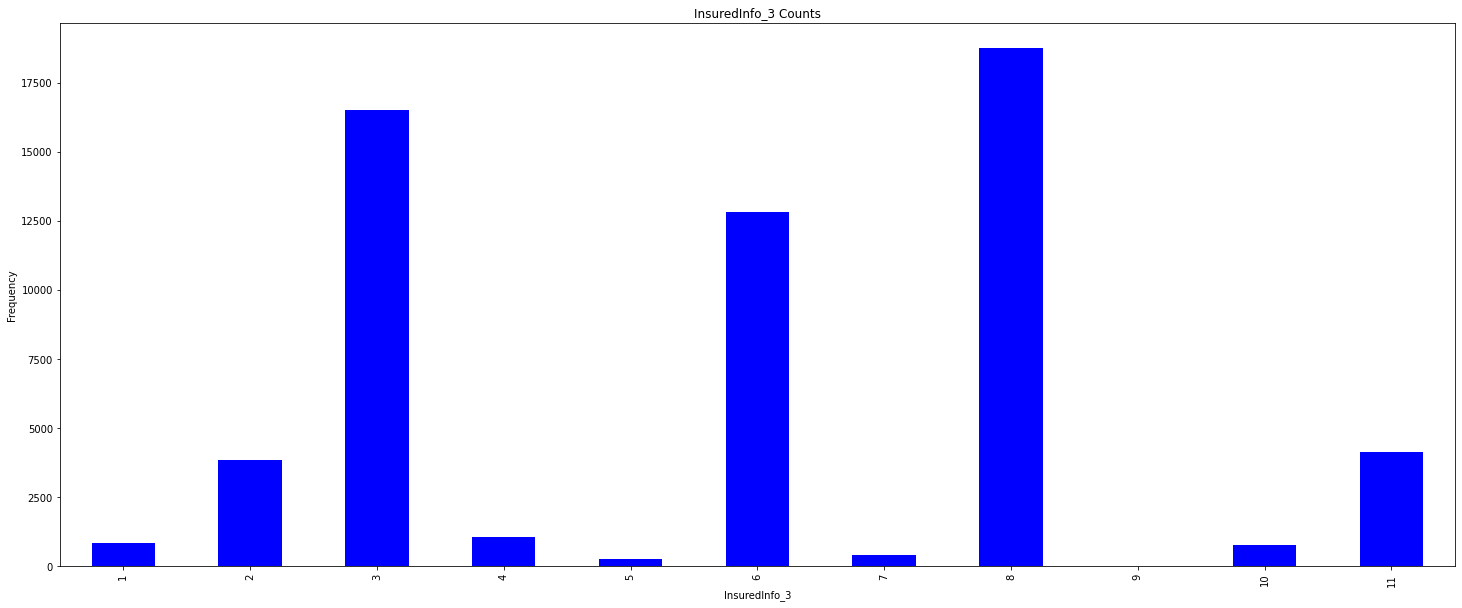

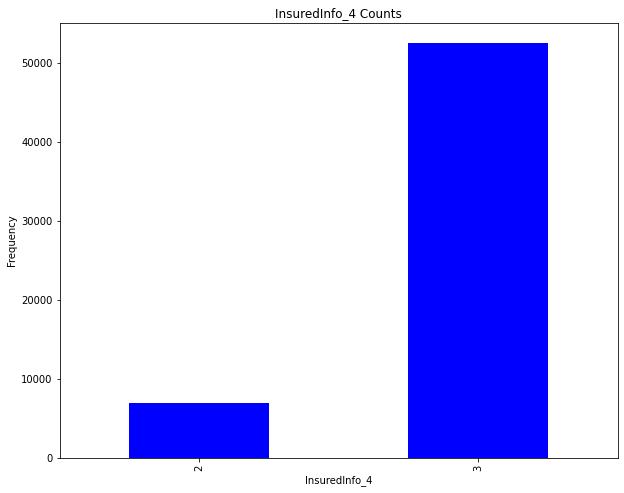

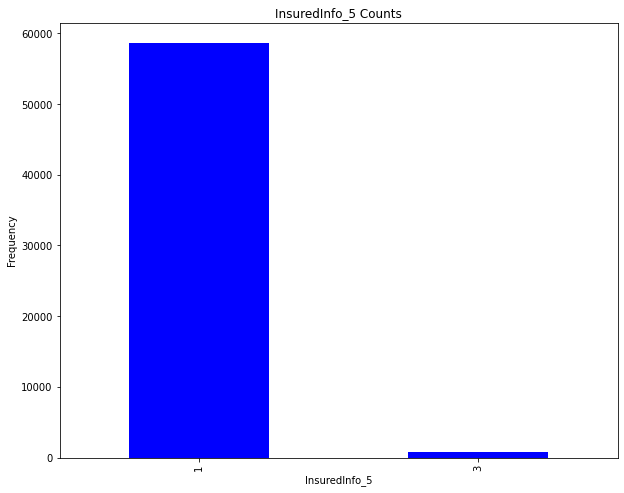

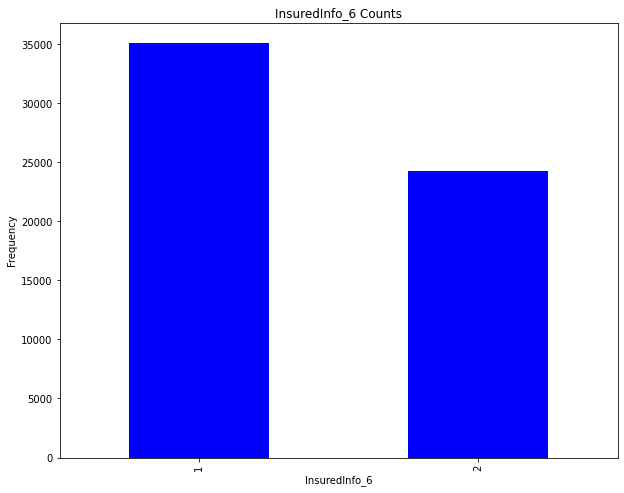

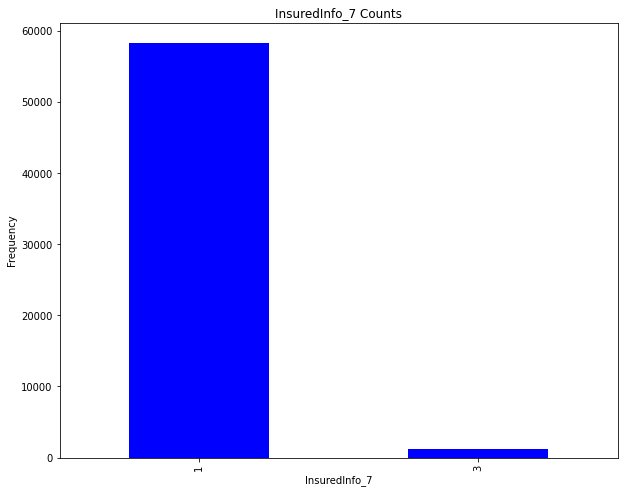

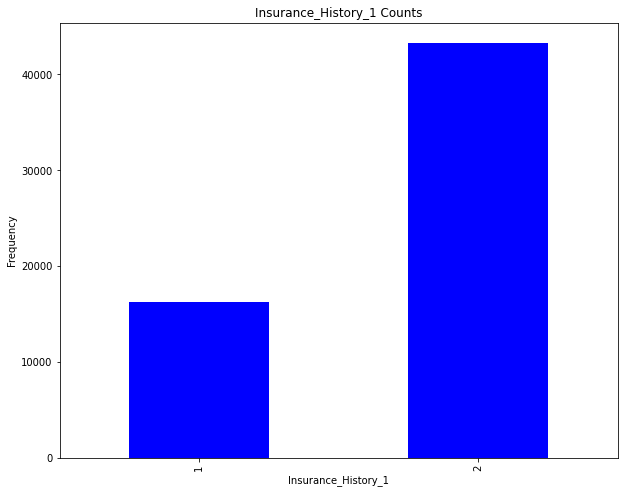

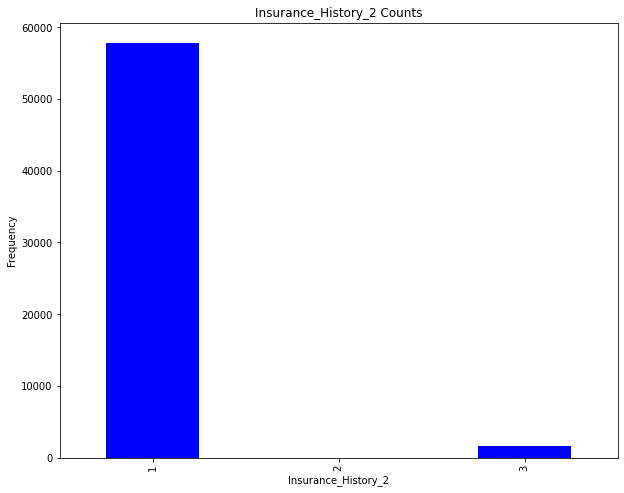

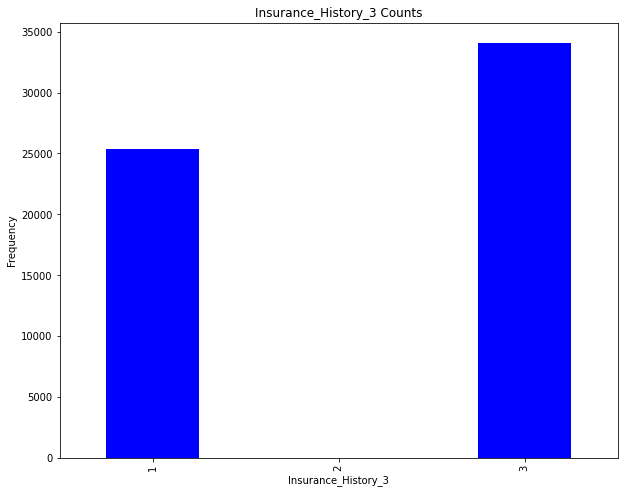

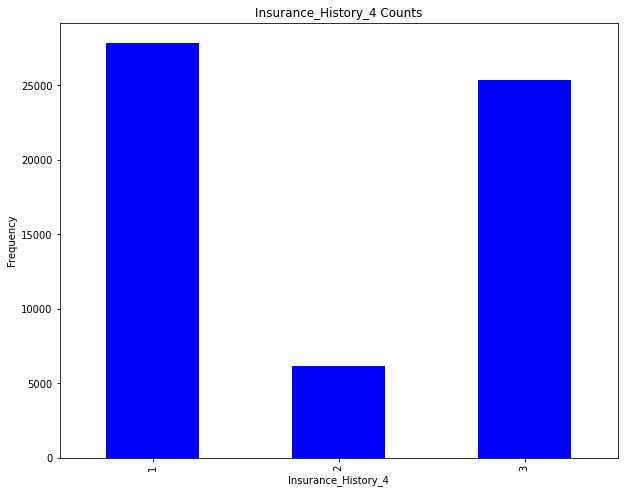

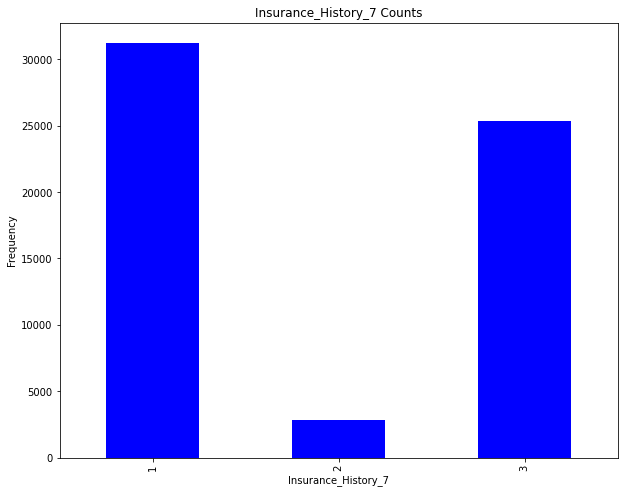

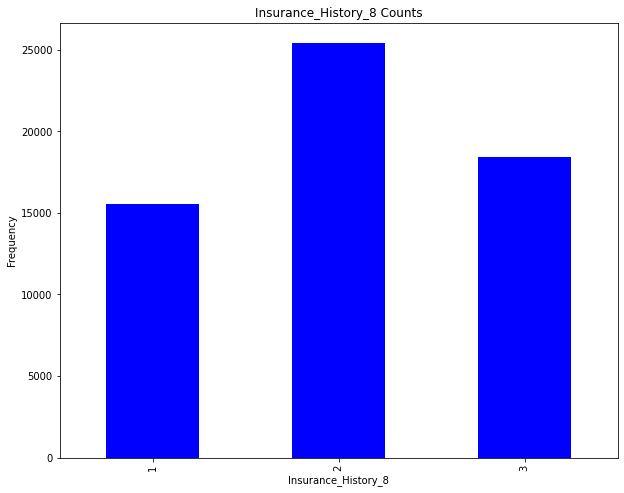

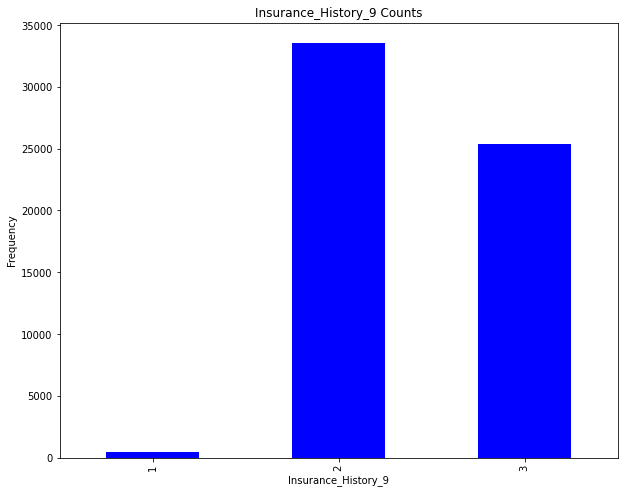

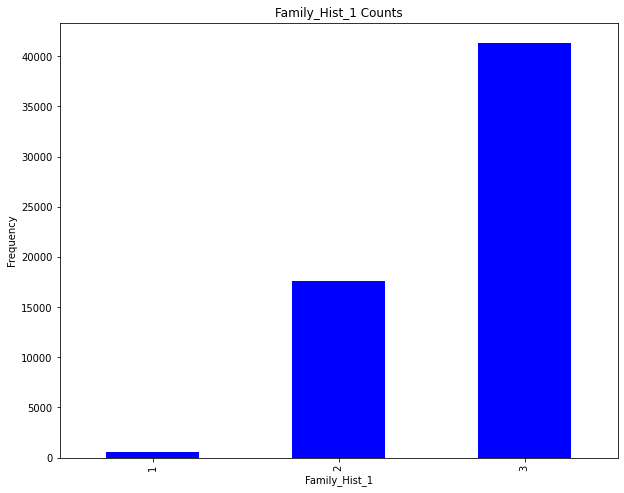

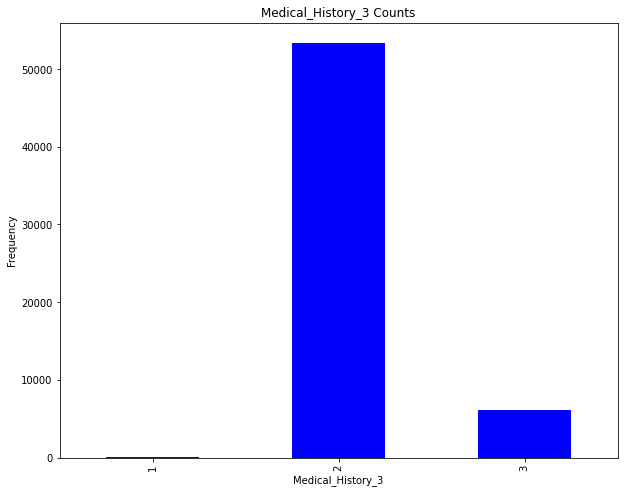

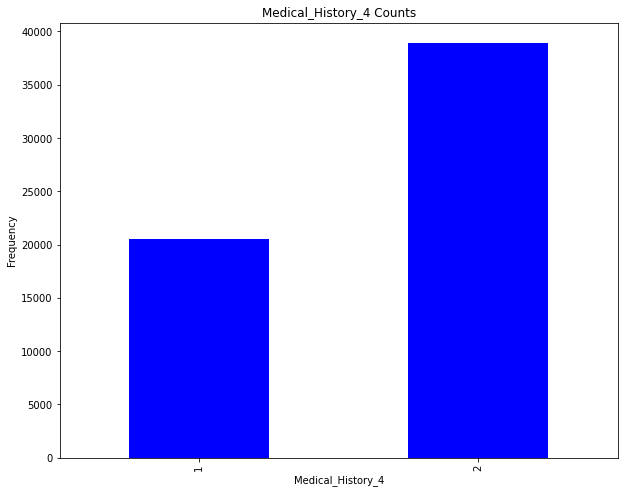

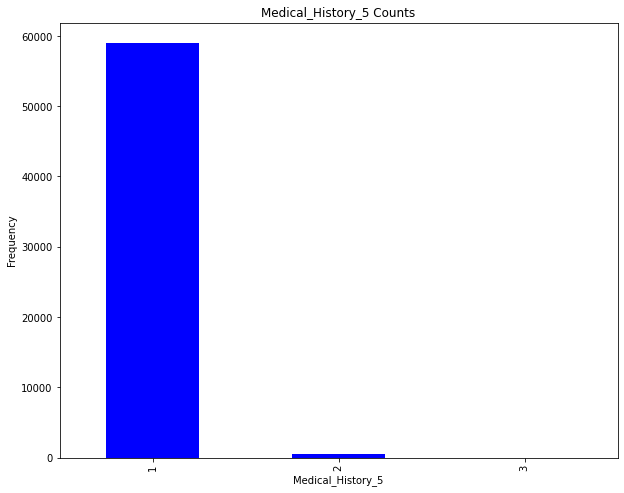

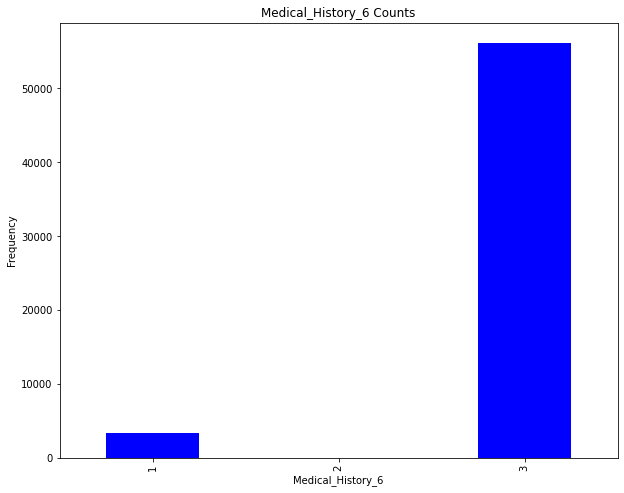

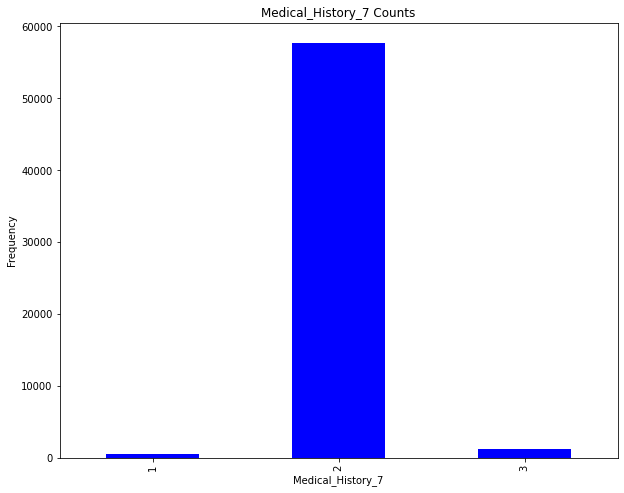

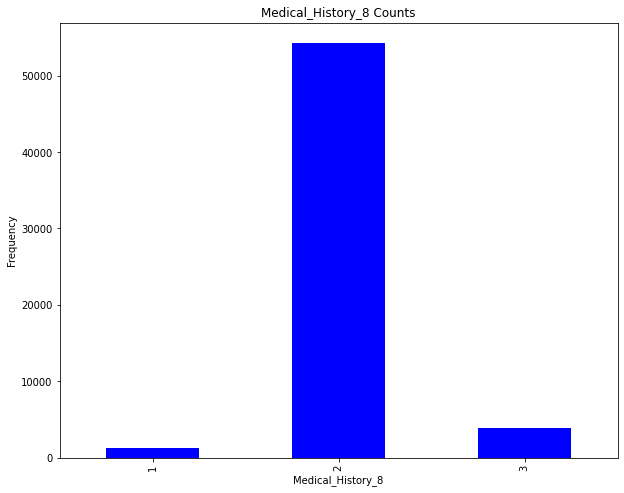

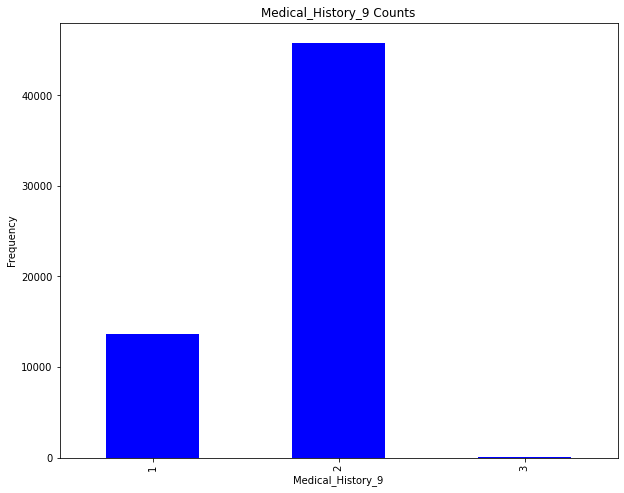

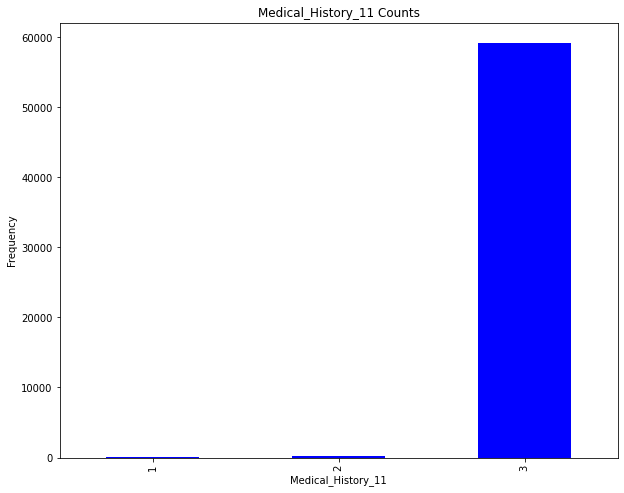

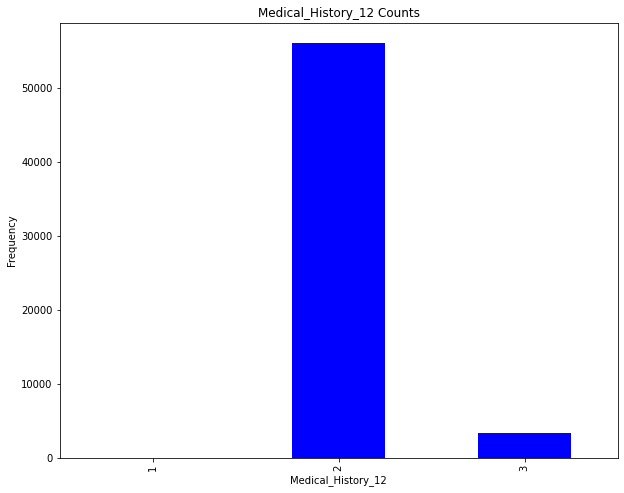

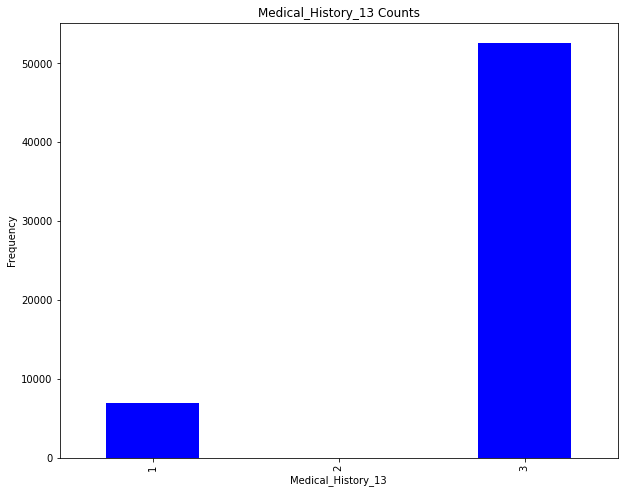

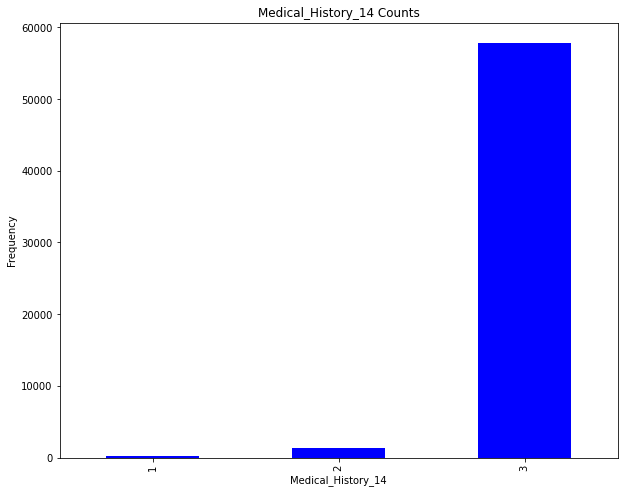

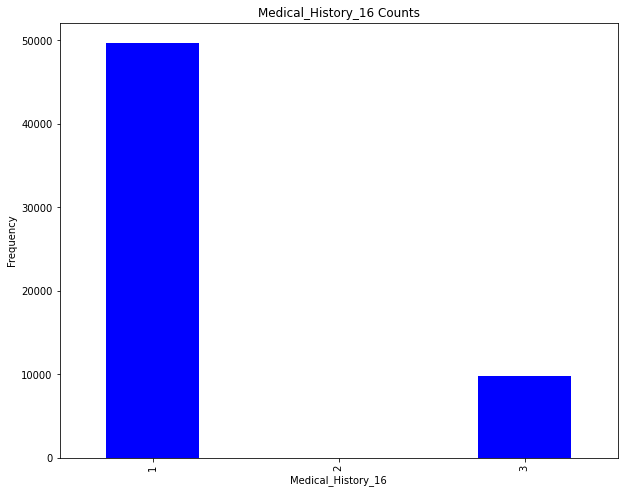

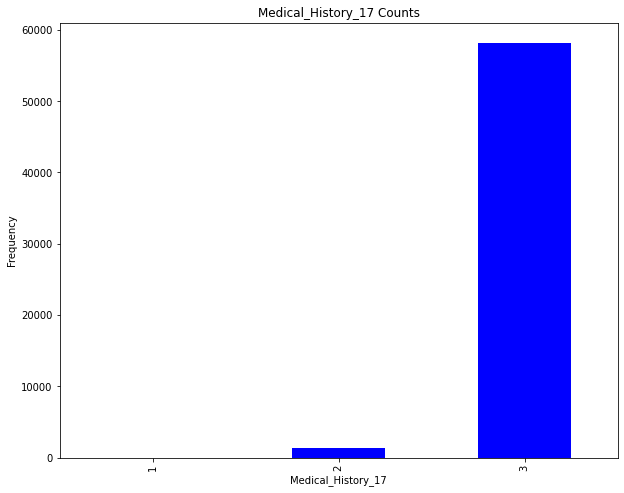

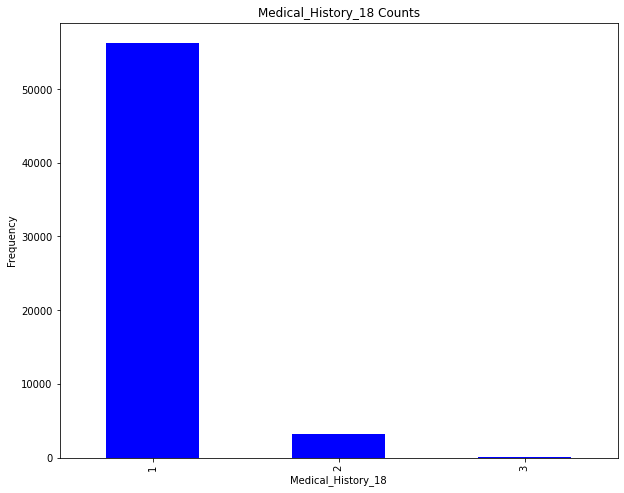

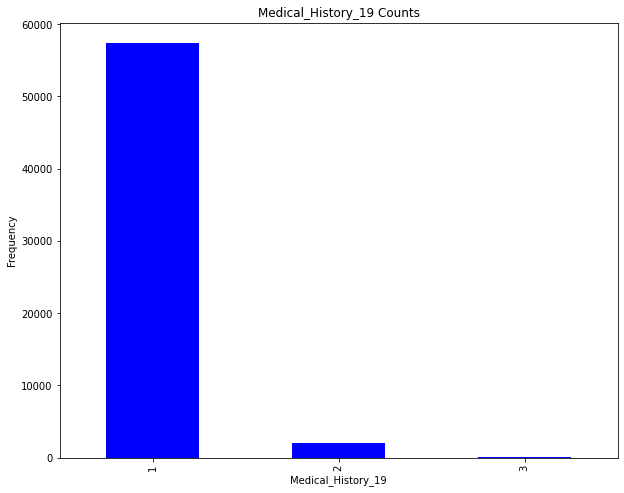

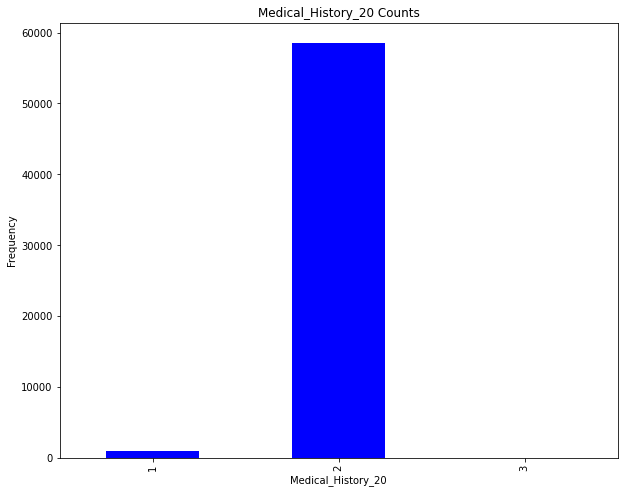

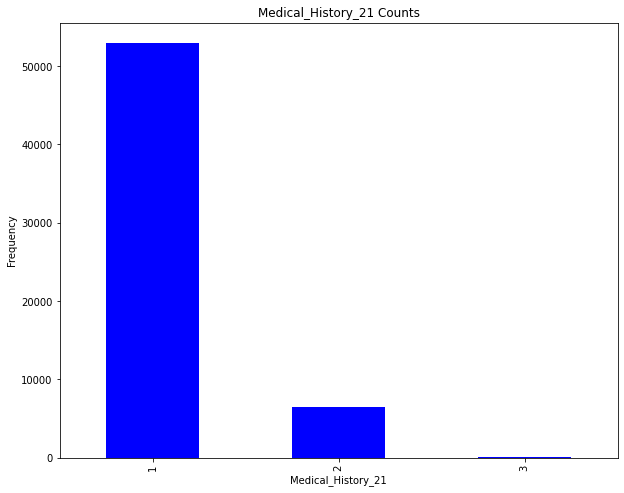

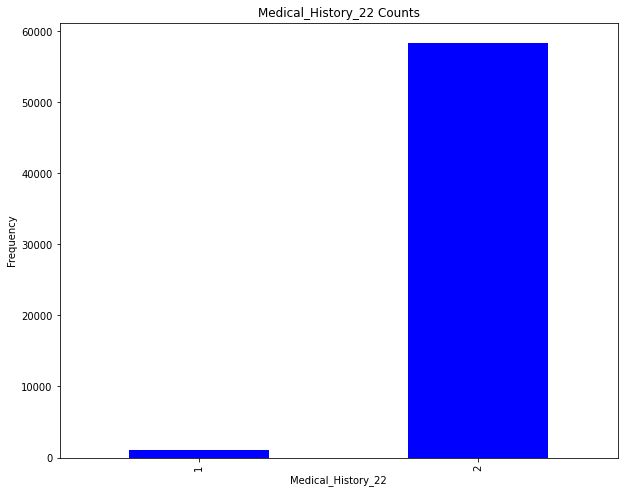

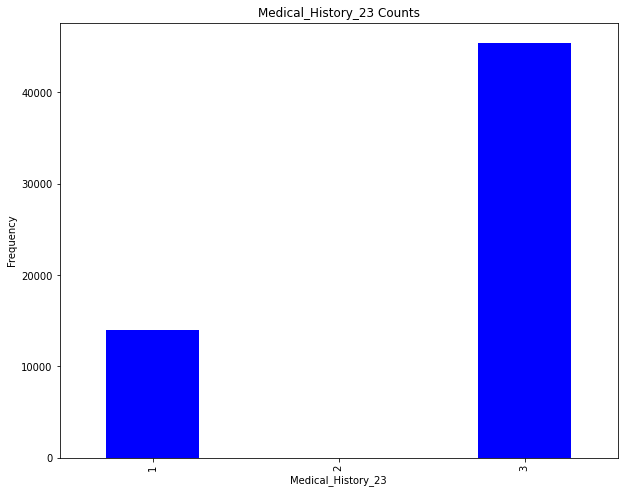

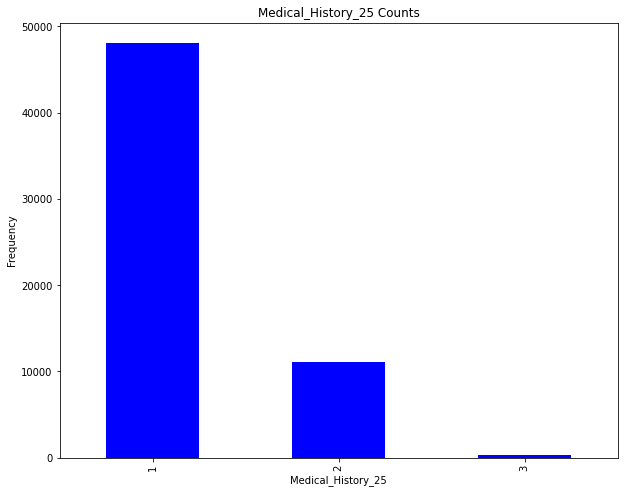

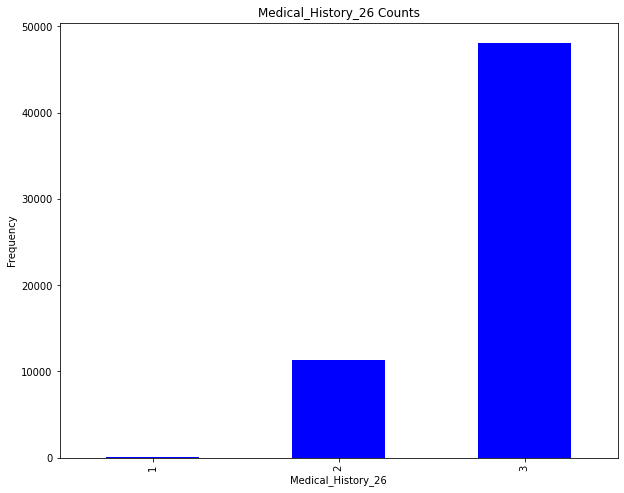

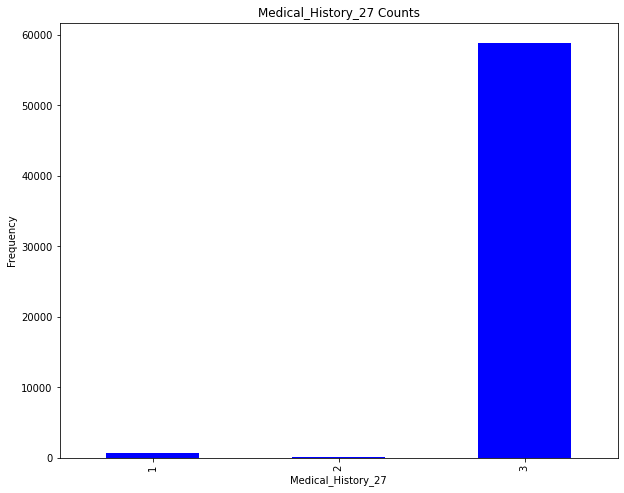

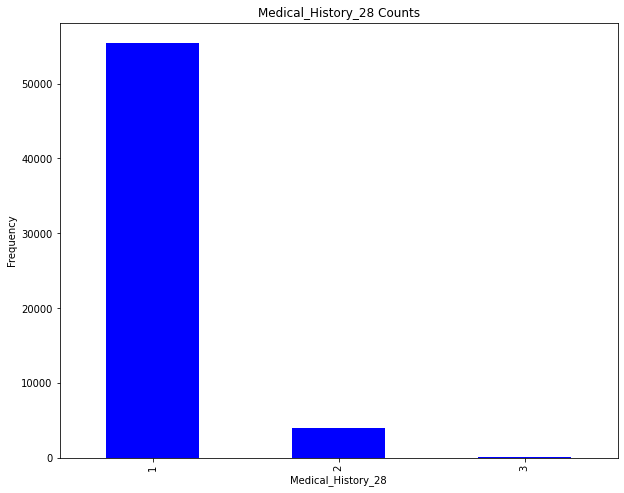

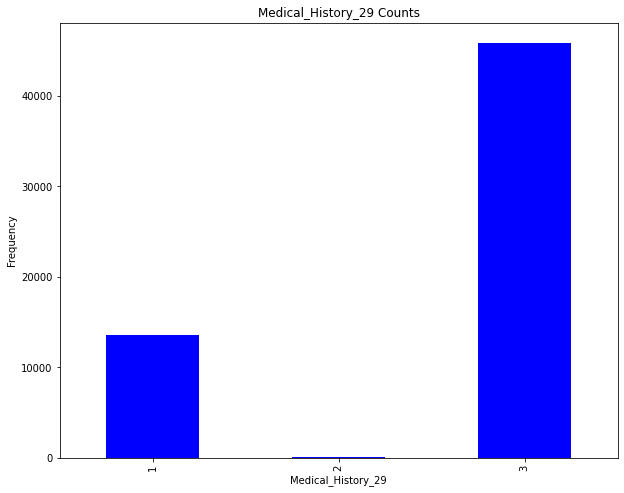

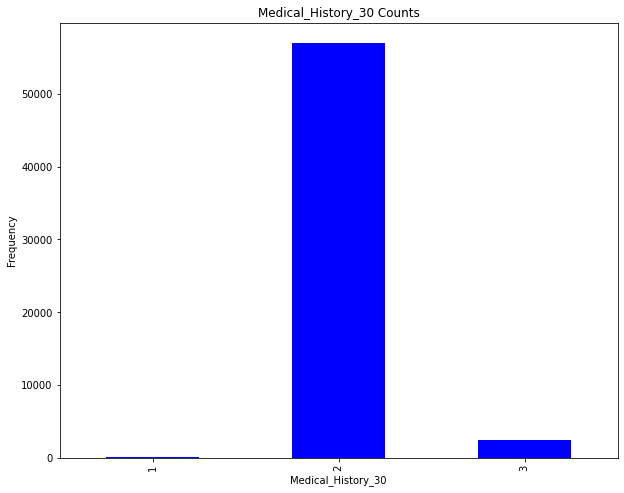

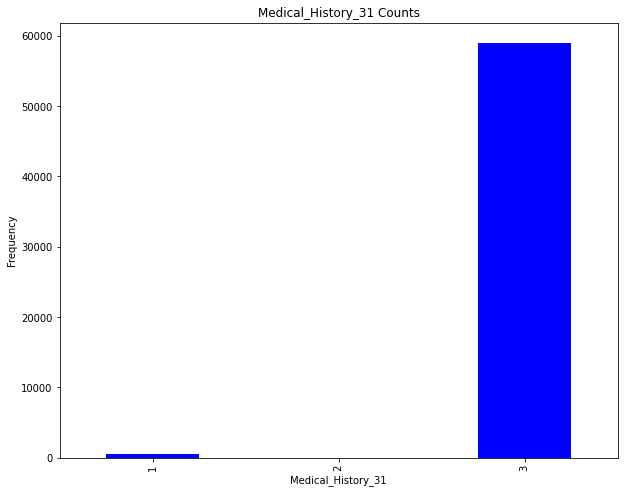

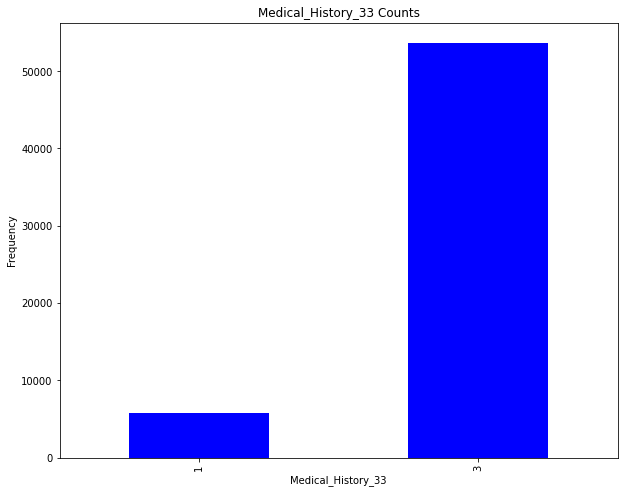

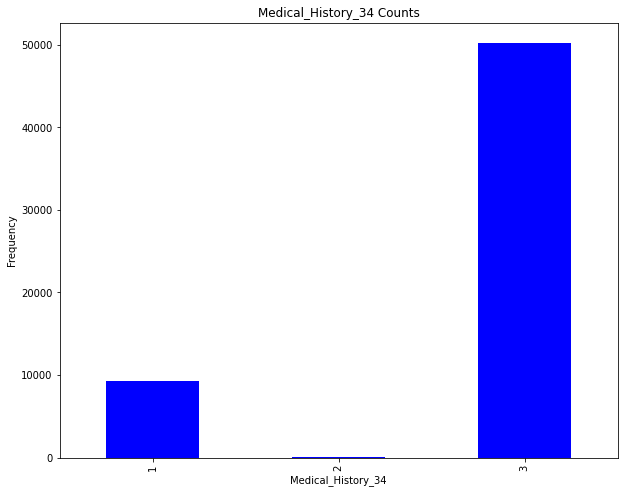

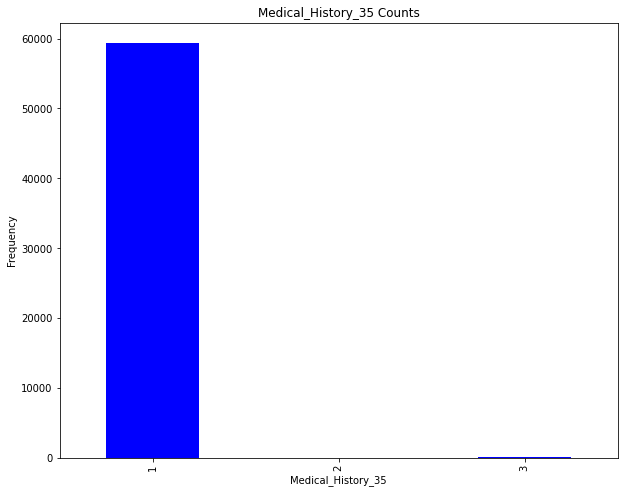

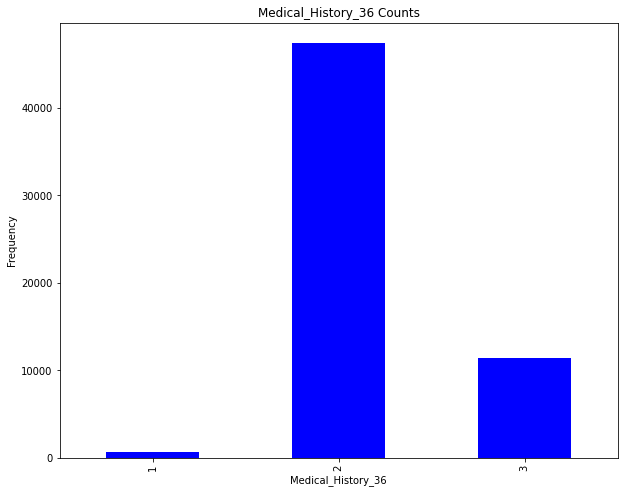

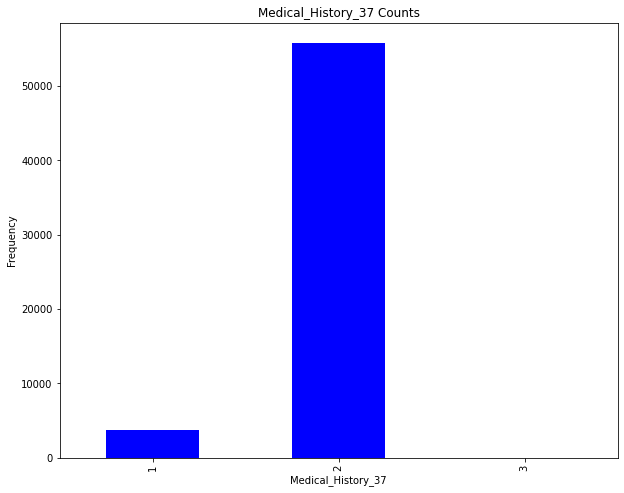

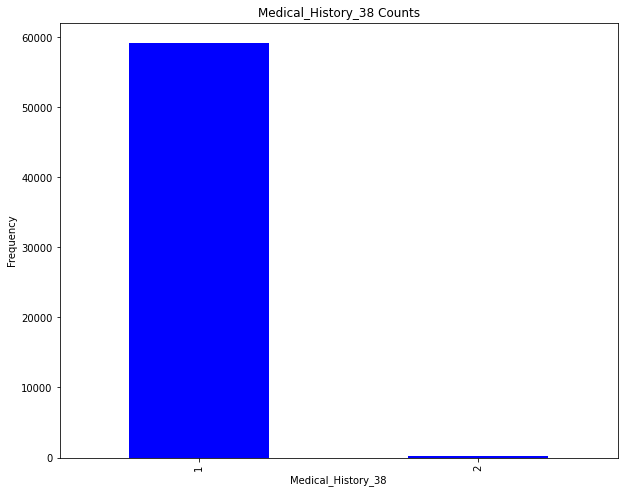

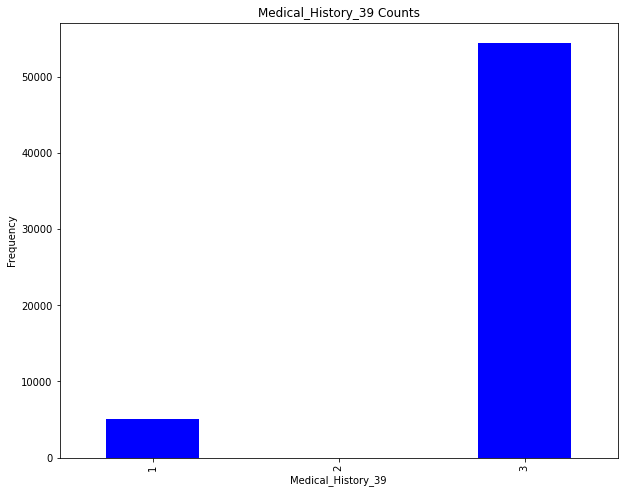

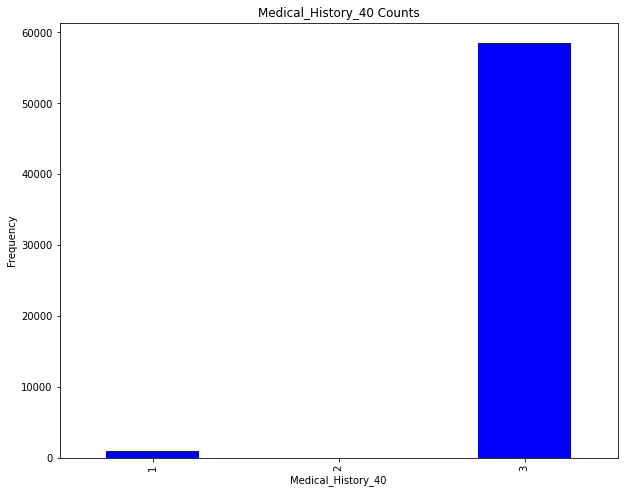

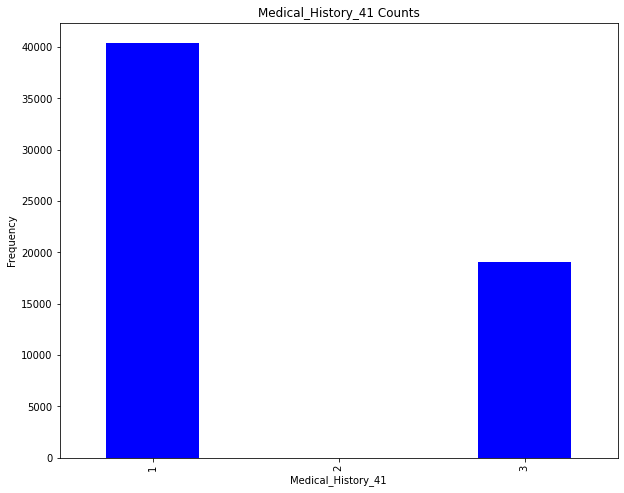

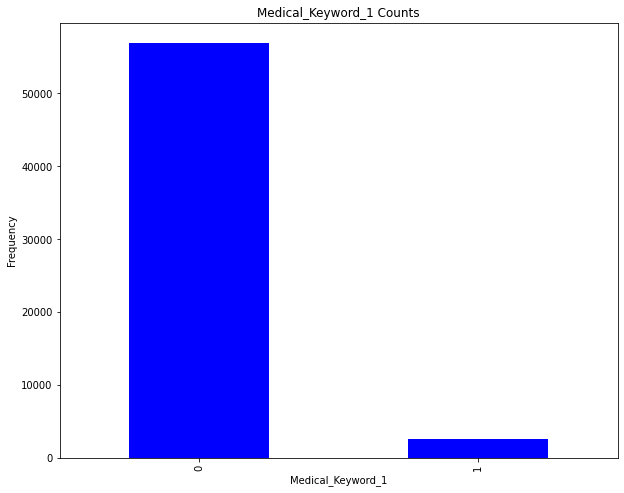

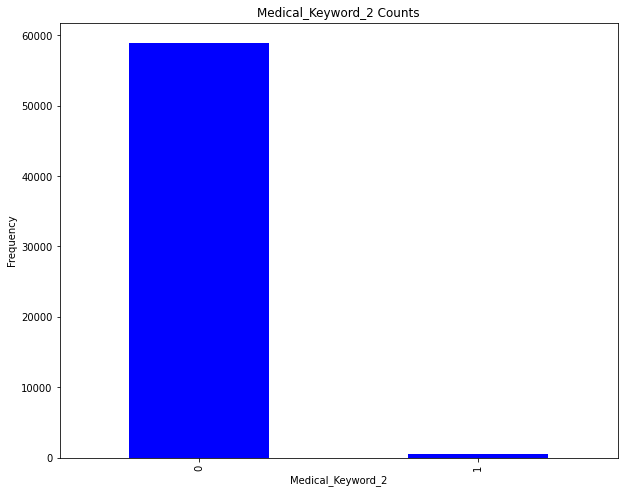

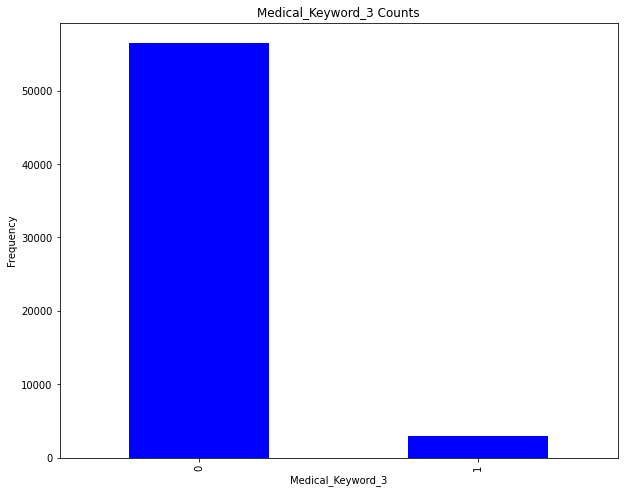

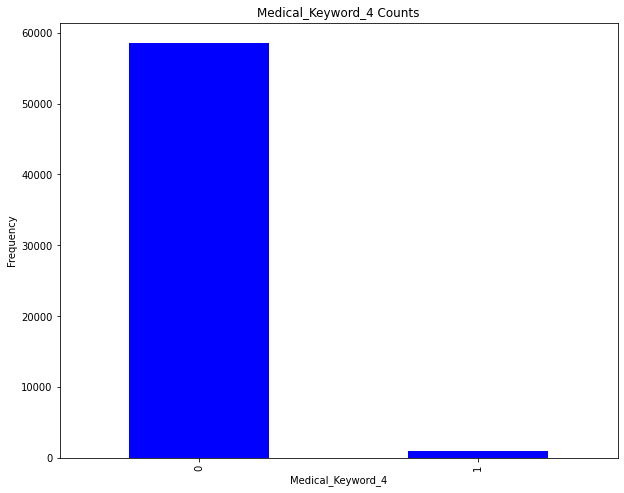

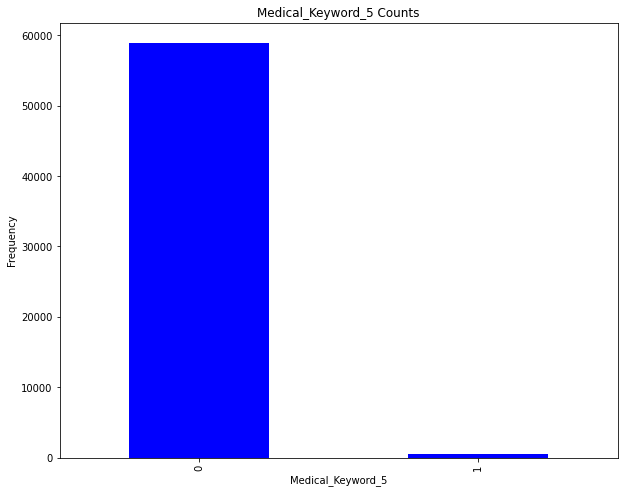

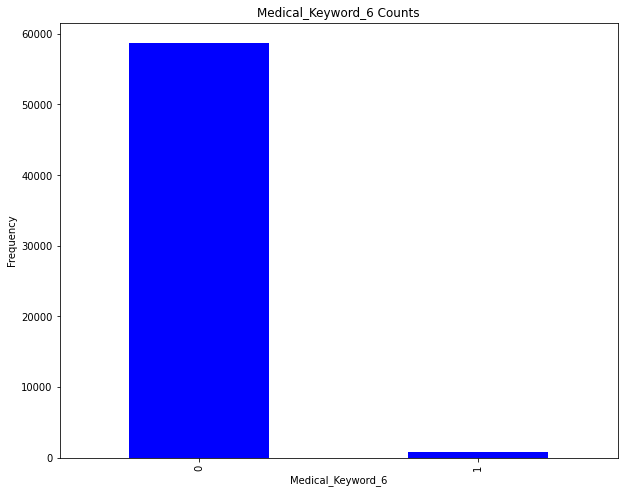

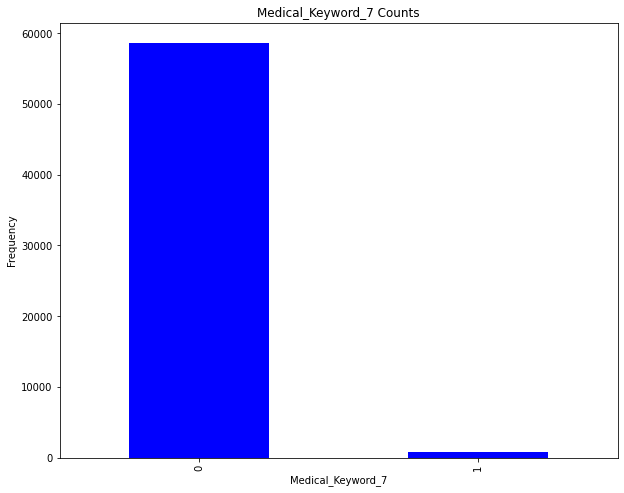

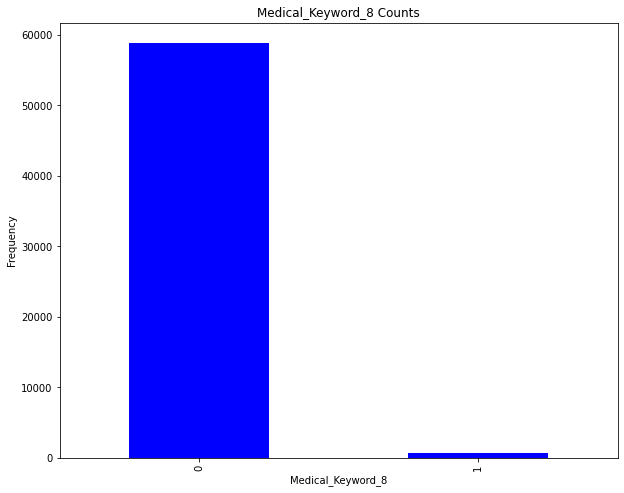

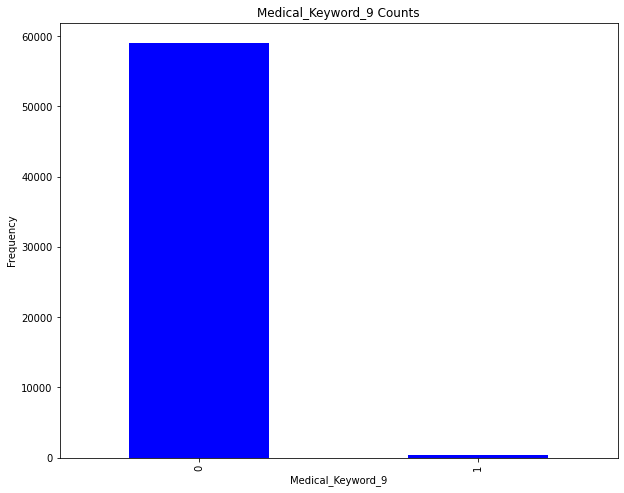

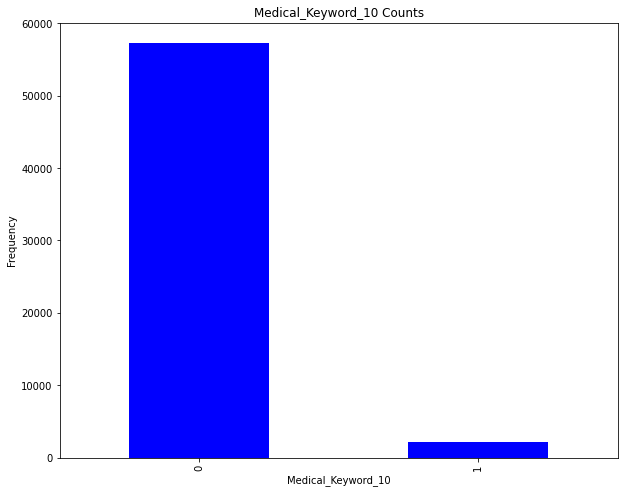

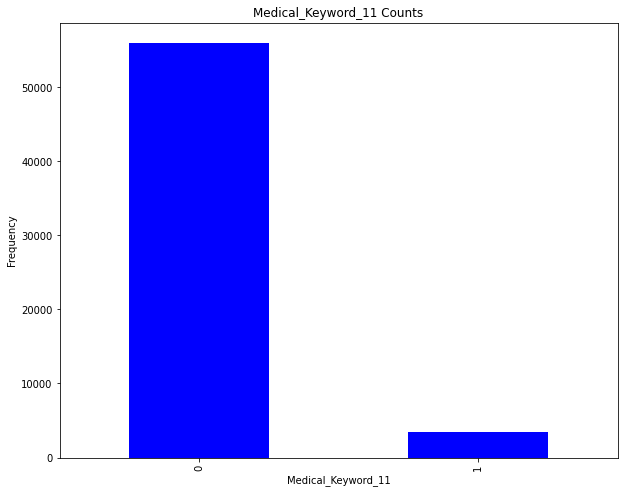

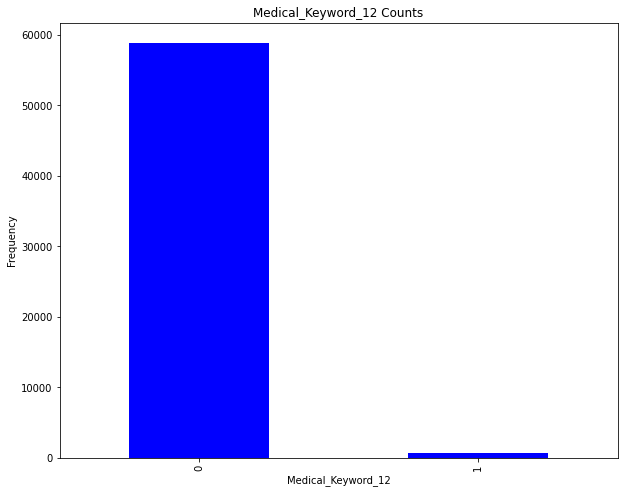

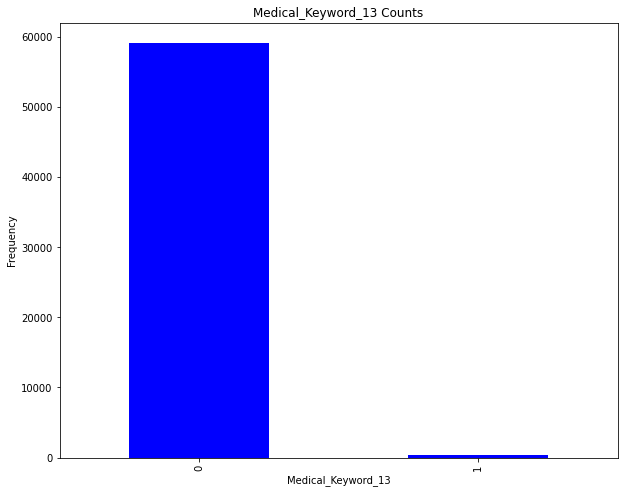

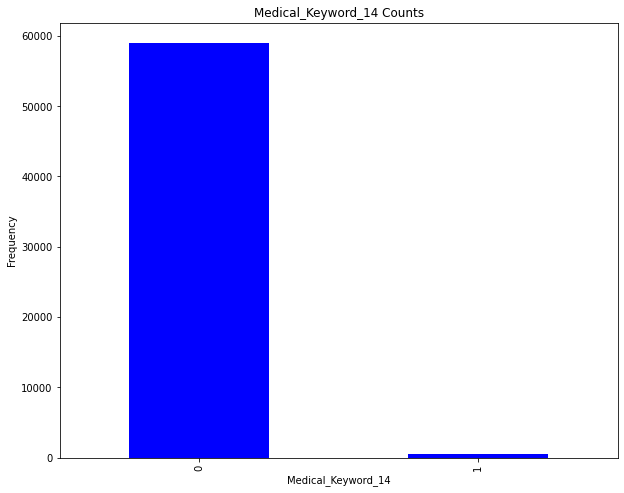

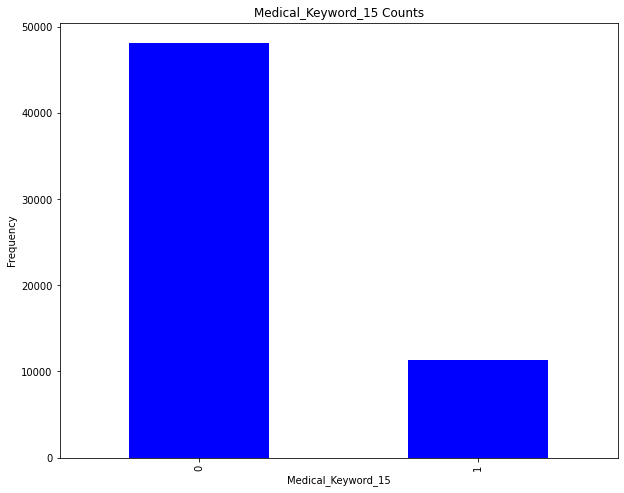

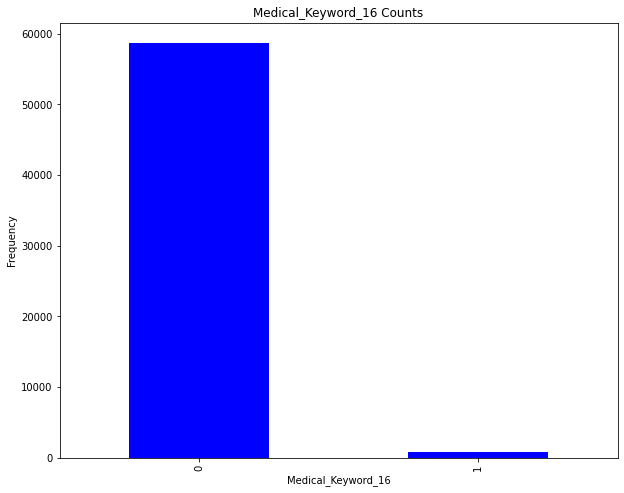

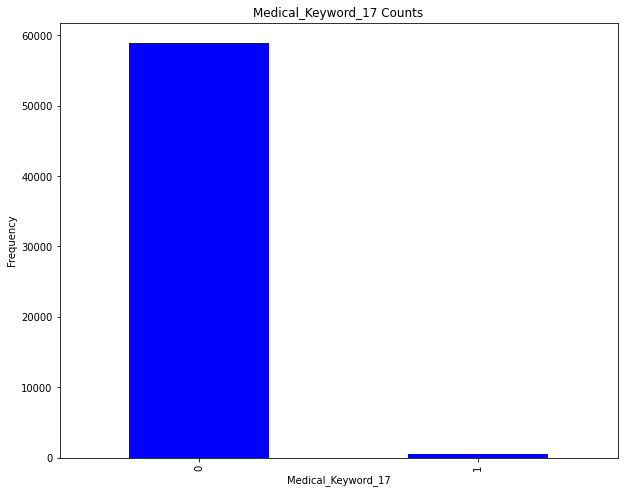

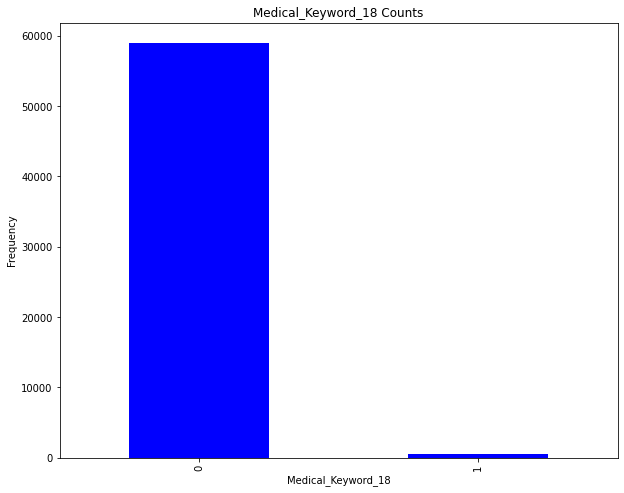

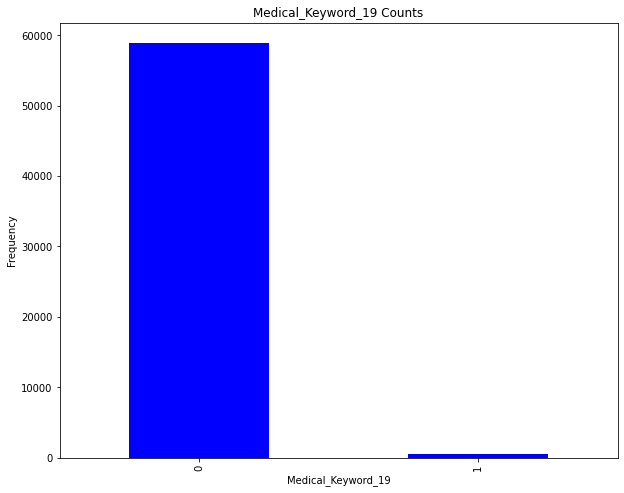

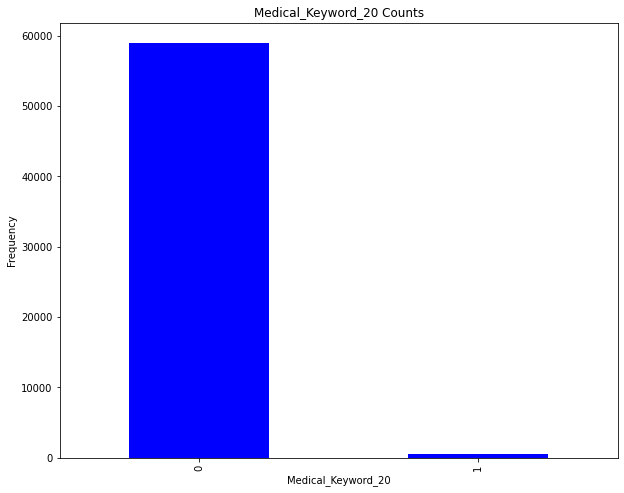

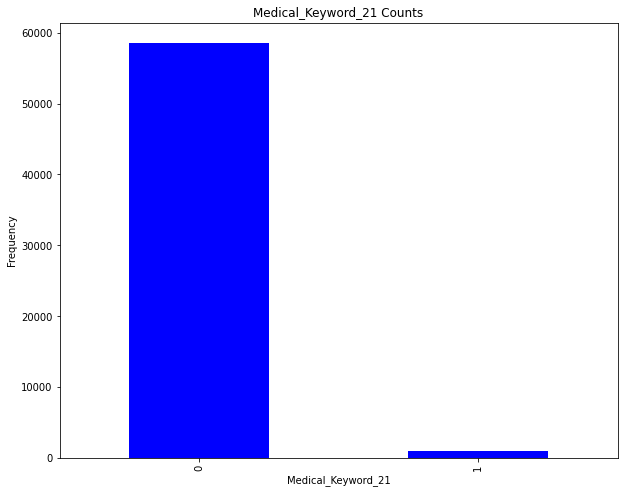

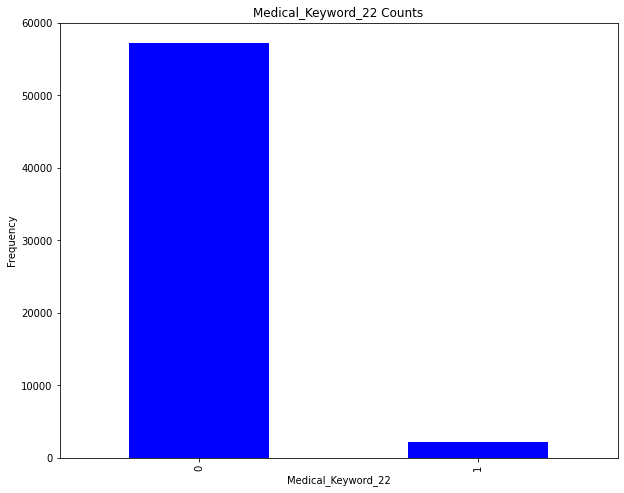

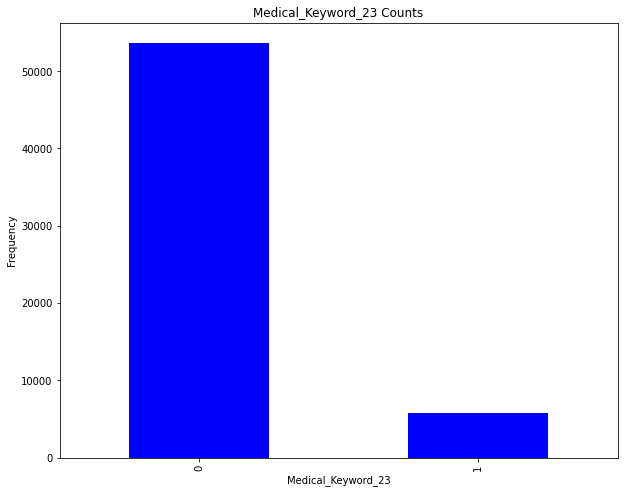

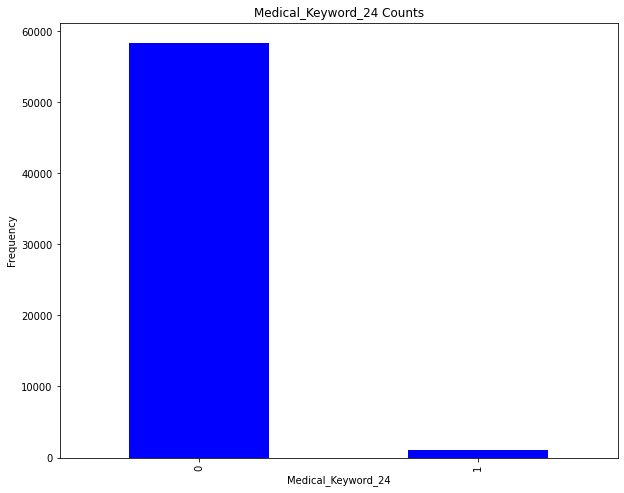

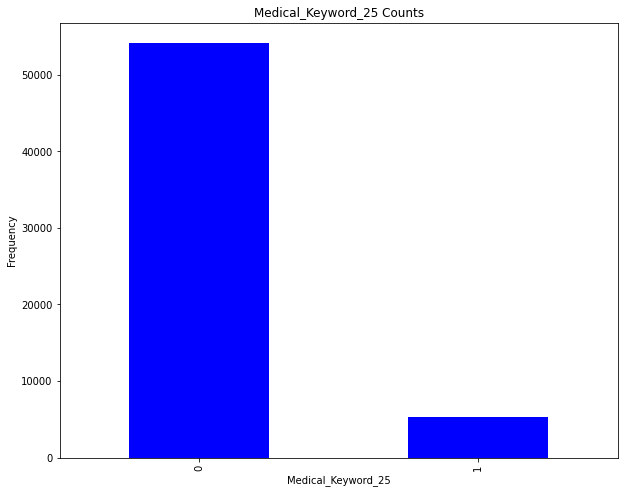

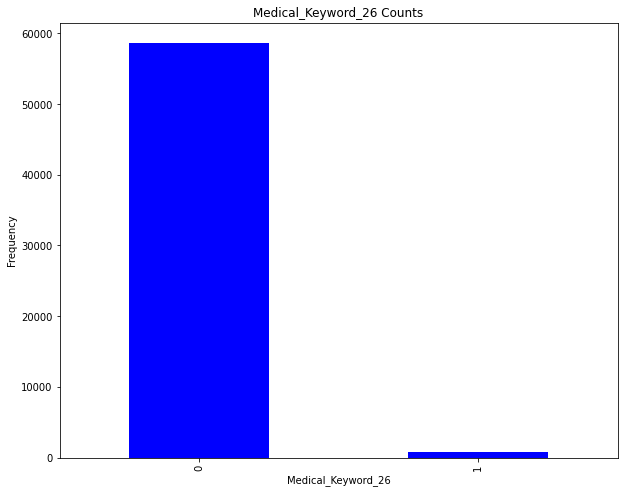

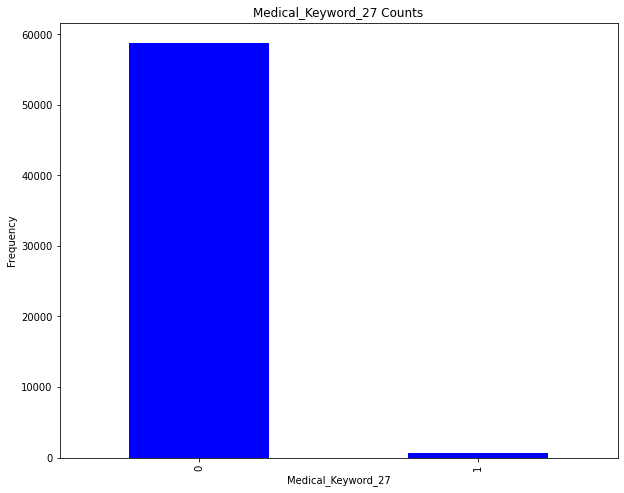

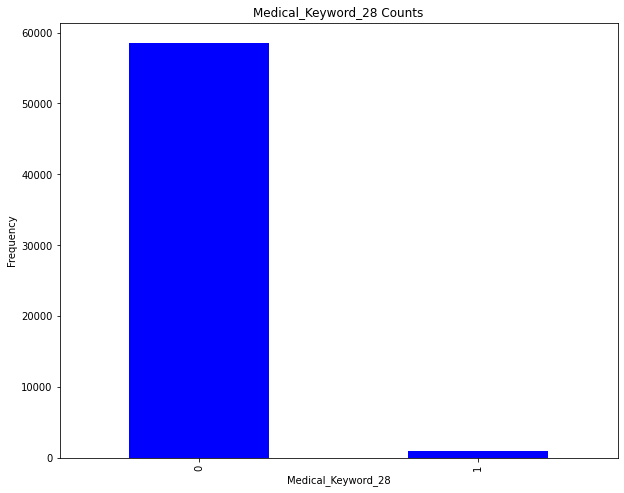

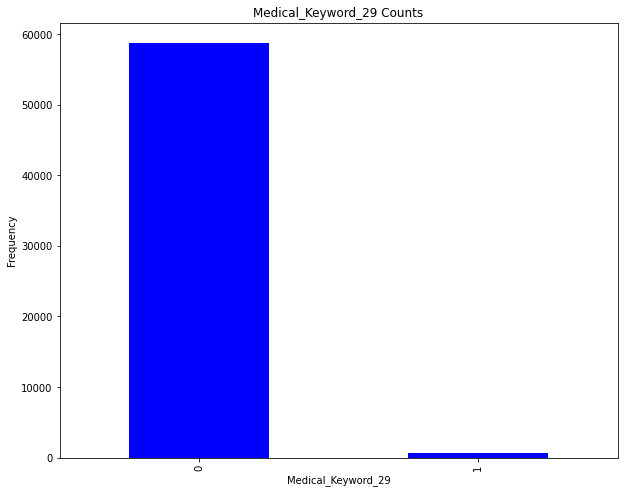

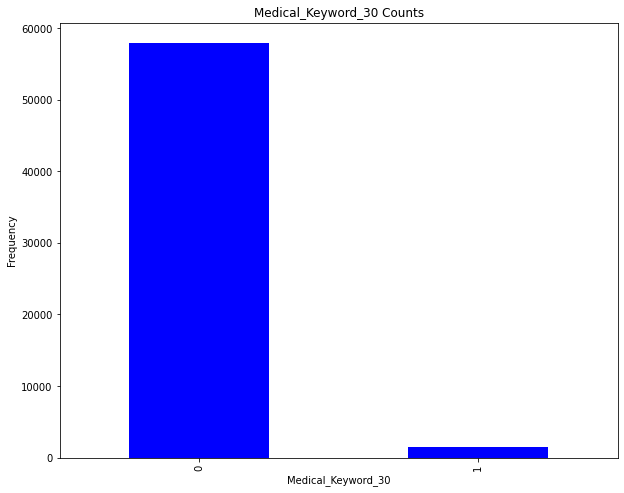

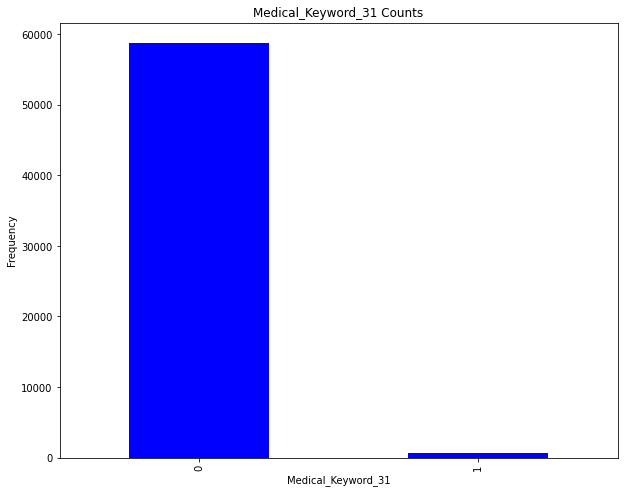

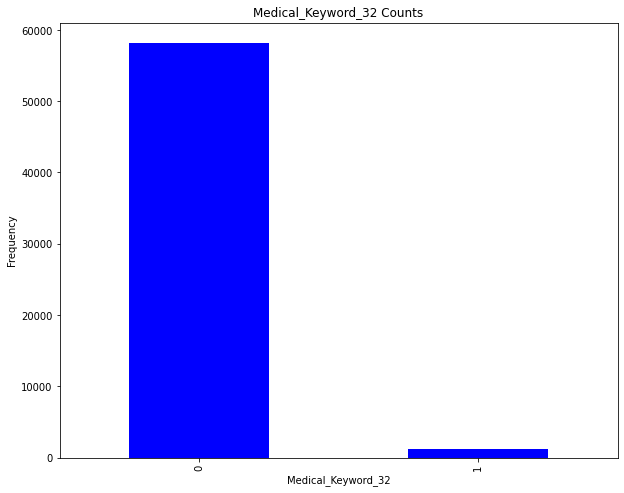

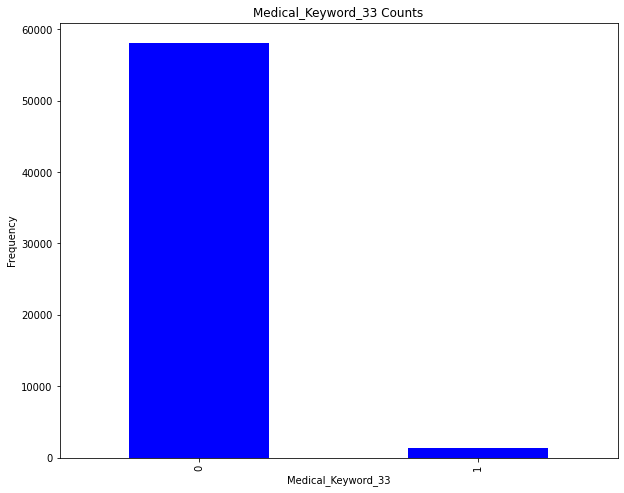

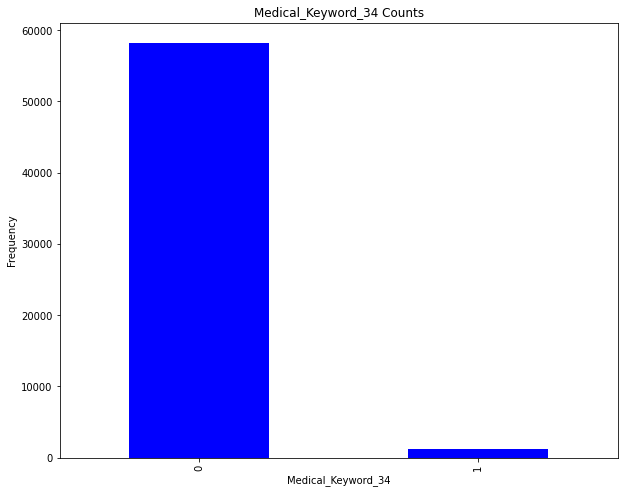

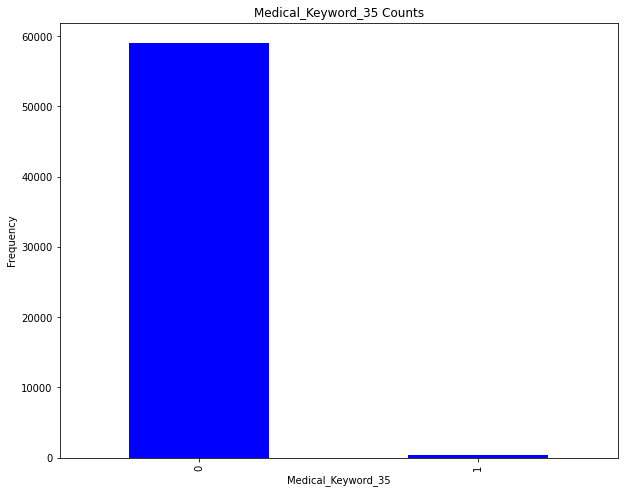

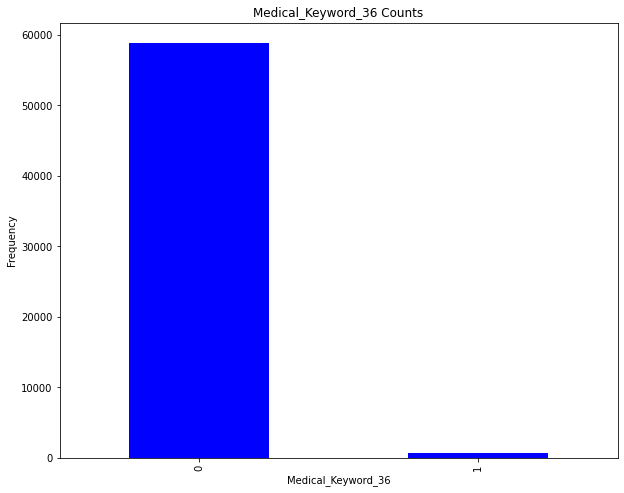

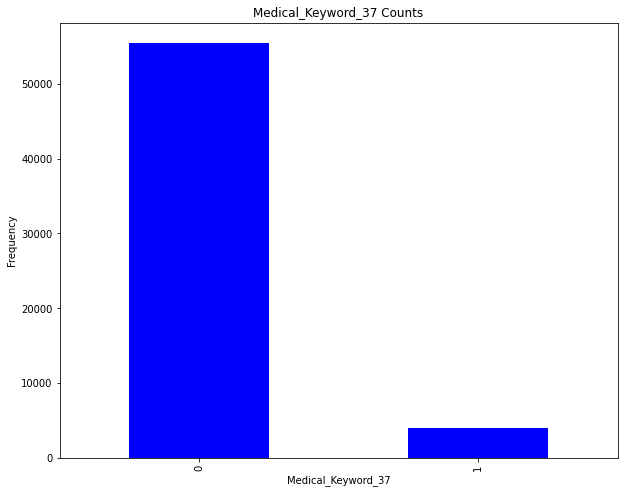

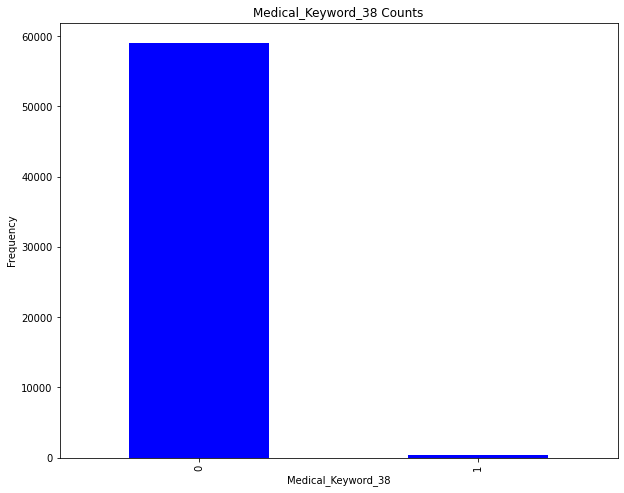

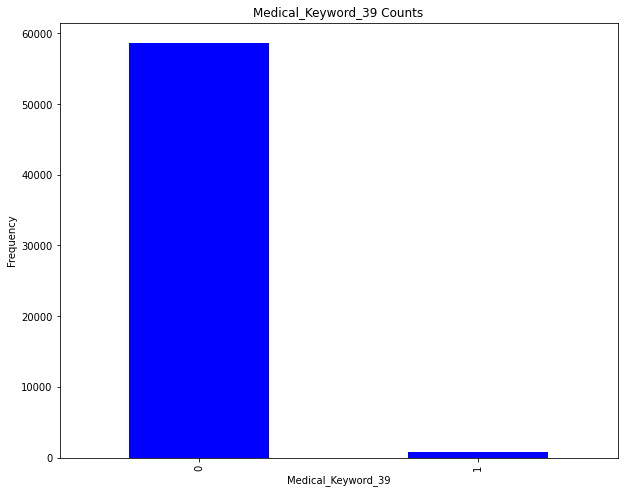

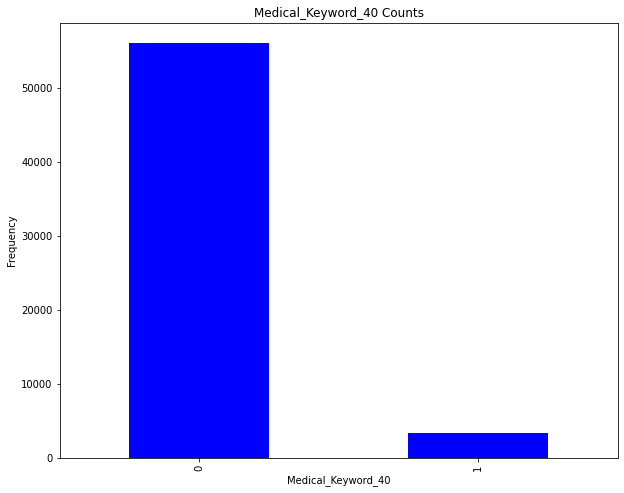

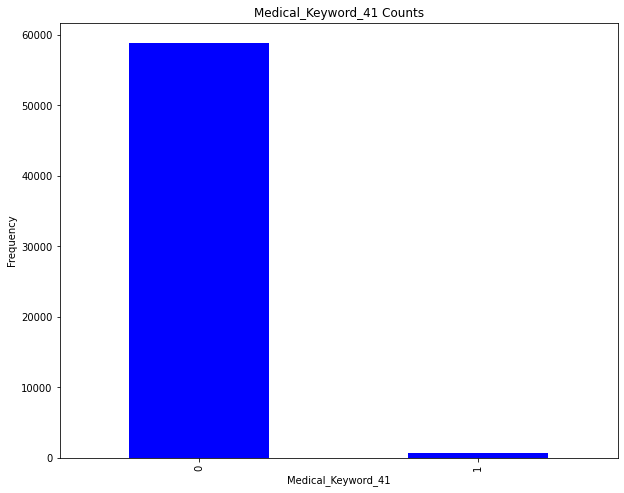

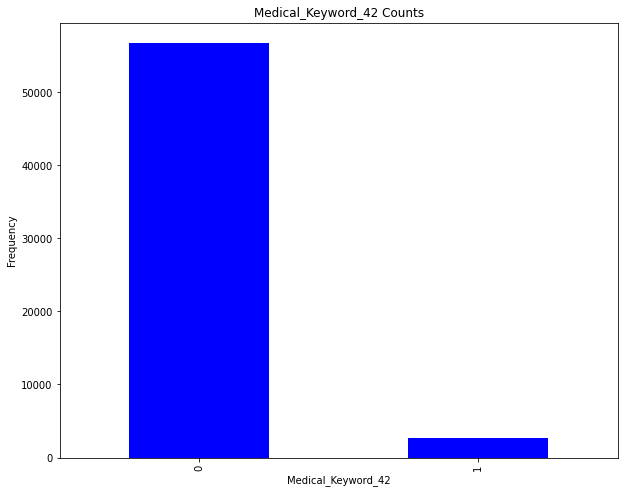

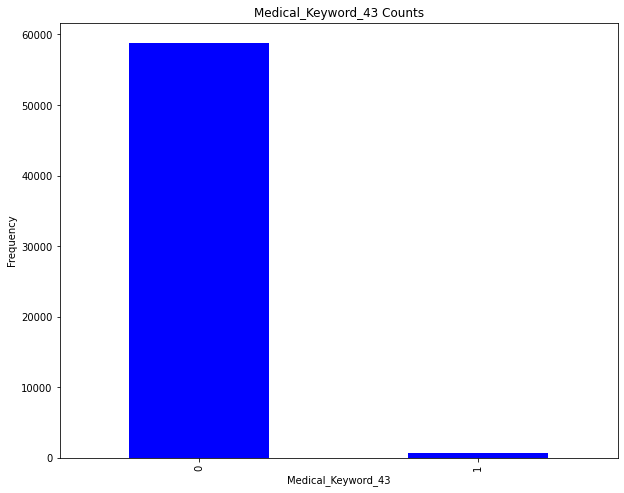

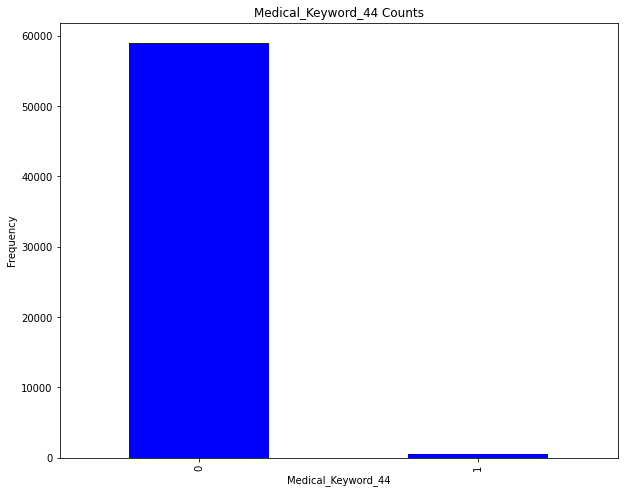

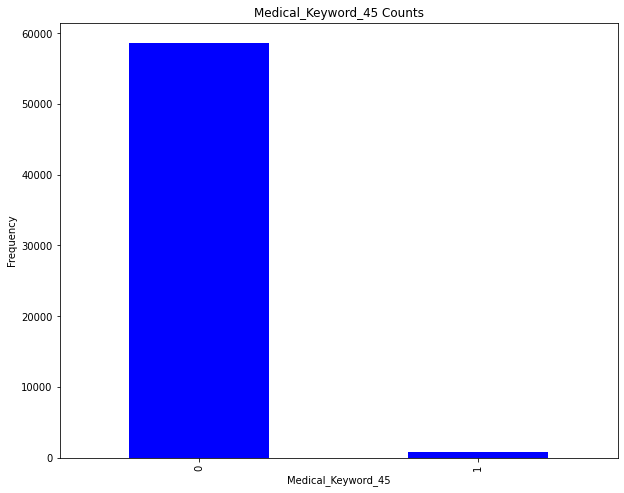

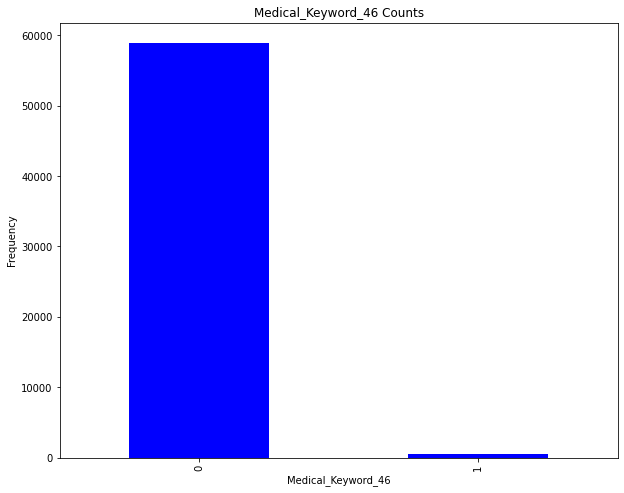

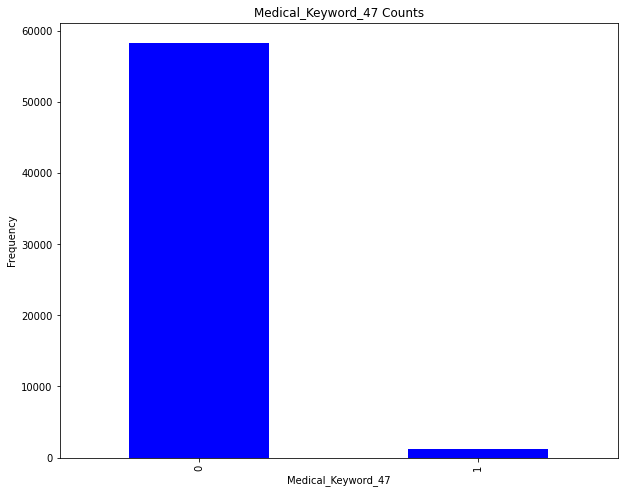

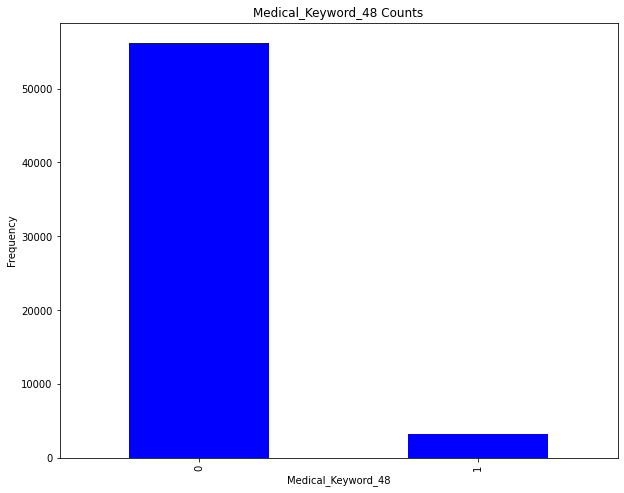

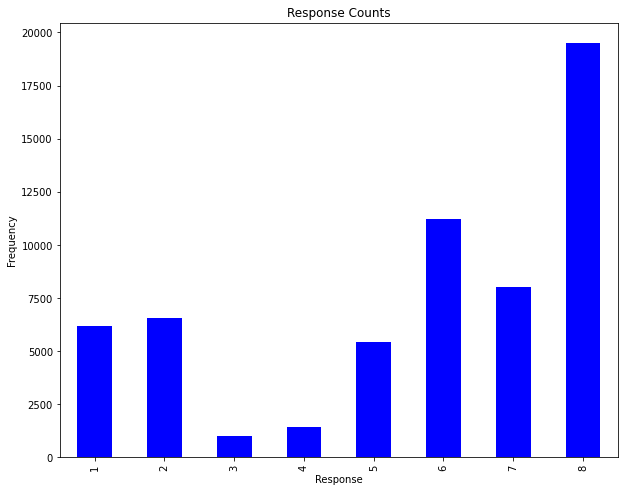

In [14]:
for col in categorical:
    counts = train[col].value_counts().sort_index()
    if len(counts) > 10 and len(counts) < 50 :
      fig = plt.figure(figsize=(25, 10))
    elif len(counts) > 50 :
      continue
    else:
      fig = plt.figure(figsize=(10, 8))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='blue')
    ax.set_title(col + ' Counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

# Data Preprocessing

Removing rows and columns with Null/NaN values

In [15]:
train.dropna()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response


Detecting missing values

In [16]:
train_missing = train.isna()

In [17]:
train_num_missing = train_missing.sum()

Missing values percentage

In [18]:
a=pd.DataFrame(train_num_missing,columns=['null_count'])
a['total']=len(train)
a['percentage_missing']=a['null_count']/a['total']

In [19]:
a[a.null_count>0]

,null_count,total,percentage_missing
Employment_Info_1,19,59381,0.000320
Employment_Info_4,6779,59381,0.114161
Employment_Info_6,10854,59381,0.182786
Insurance_History_5,25396,59381,0.427679
Family_Hist_2,28656,59381,0.482579
Family_Hist_3,34241,59381,0.576632
Family_Hist_4,19184,59381,0.323066
Family_Hist_5,41811,59381,0.704114
Medical_History_1,8889,59381,0.149694
Medical_History_10,58824,59381,0.990620


Removing 8 columns whose percentage of missing values is more than 30%

In [20]:
train_new=train.drop(['Medical_History_32','Medical_History_24','Medical_History_15','Medical_History_10',
                      'Family_Hist_5','Family_Hist_3','Family_Hist_2','Insurance_History_5'], axis=1)

In [21]:
test_new=test.drop(['Medical_History_32','Medical_History_24','Medical_History_15','Medical_History_10',
                      'Family_Hist_5','Family_Hist_3','Family_Hist_2','Insurance_History_5'], axis=1)

New Shapes of Training & Testing dataset

In [22]:
train_new.shape, test_new.shape

((59381, 120), (19765, 119))

## Visualising Correlation Greater Than .85







In [23]:
corr = train_new.corr()
corr_greater_than_85 = corr[corr>=.85]
corr_greater_than_85

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
Id,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Info_1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Info_3,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Info_4,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Info_5,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Medical_Keyword_45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Medical_Keyword_46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Medical_Keyword_47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Medical_Keyword_48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


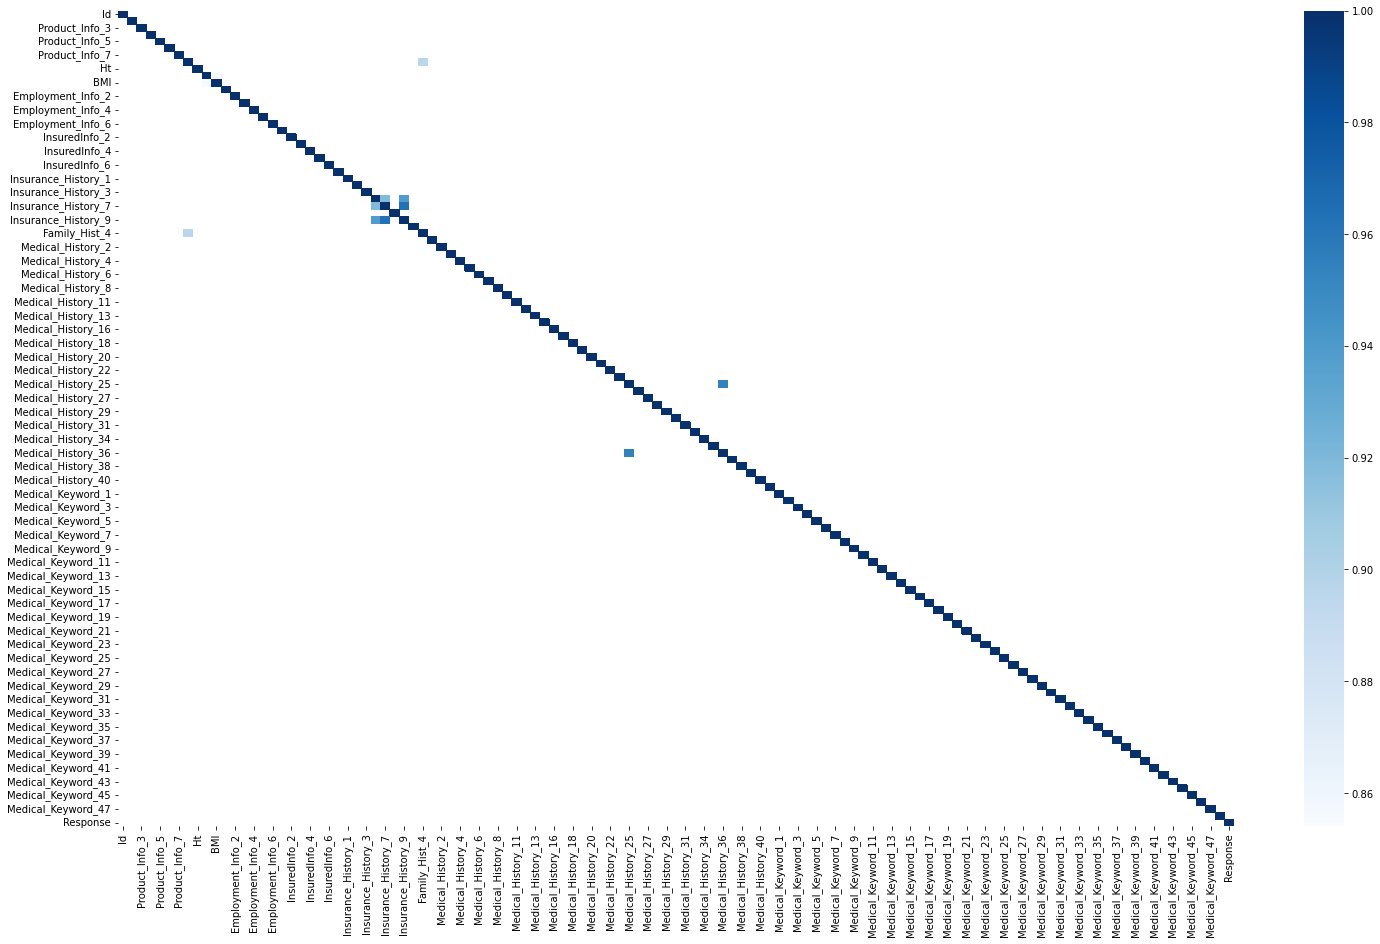

In [24]:
plt.figure(figsize=(25,15))
sn.heatmap(corr_greater_than_85, cmap="Blues");

Conclusion: Weight & BMI is highly correlated, these 2 features are pretty much directly proprtional.

## Mean / Median Imputation

Replacing NaNs using Median/Mean of the column

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


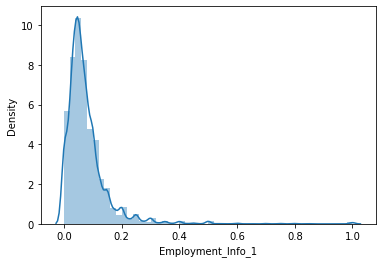

In [25]:
sn.distplot(train_new['Employment_Info_1']) #Left-skewed: Median

In [26]:
train_new['Employment_Info_1'] = train_new['Employment_Info_1'].fillna(train_new['Employment_Info_1'].median())

In [27]:
test_new['Employment_Info_1'] = test_new['Employment_Info_1'].fillna(train_new['Employment_Info_1'].median())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


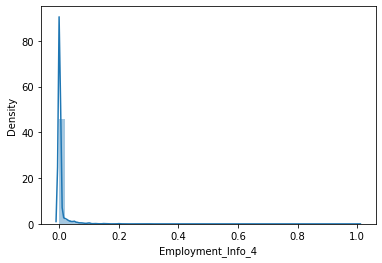

In [28]:
sn.distplot(train_new['Employment_Info_4']) #Left-skewed: Median

In [29]:
train_new['Employment_Info_4'] = train_new['Employment_Info_4'].fillna(train_new['Employment_Info_4'].median())

In [30]:
test_new['Employment_Info_4'] = test_new['Employment_Info_4'].fillna(train_new['Employment_Info_4'].median())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


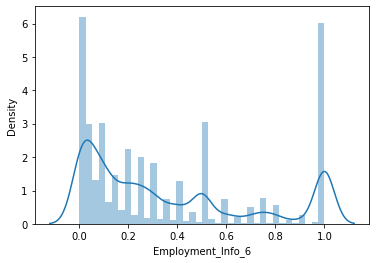

In [31]:
sn.distplot(train_new['Employment_Info_6']) #Skewed: Median

In [32]:
train_new['Employment_Info_6'] = train_new['Employment_Info_6'].fillna(train_new['Employment_Info_6'].median())

In [33]:
test_new['Employment_Info_6'] = test_new['Employment_Info_6'].fillna(train_new['Employment_Info_6'].median())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


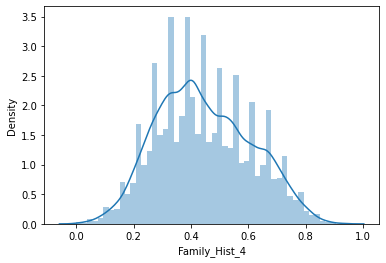

In [34]:
sn.distplot(train_new['Family_Hist_4']) #Not really all that skewed: Mean

In [35]:
train_new['Family_Hist_4'] = train_new['Family_Hist_4'].fillna(train_new['Family_Hist_4'].mean())

In [36]:
test_new['Family_Hist_4'] = test_new['Family_Hist_4'].fillna(train_new['Family_Hist_4'].mean())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


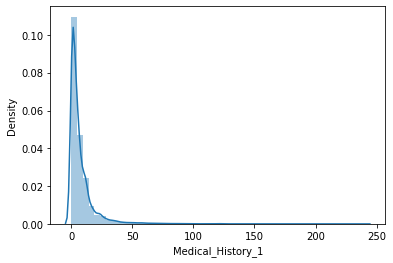

In [37]:
sn.distplot(train_new['Medical_History_1']) #Left-skewed: Median

In [38]:
train_new['Medical_History_1'] = train_new['Medical_History_1'].fillna(train_new['Medical_History_1'].median())

In [39]:
test_new['Medical_History_1'] = test_new['Medical_History_1'].fillna(train_new['Medical_History_1'].median())

In [40]:
train_new.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


In [41]:
test_new.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
0,1,1,D3,26,0.487179,2,3,1,0.611940,0.781818,...,0,0,0,0,0,0,0,0,0,0
1,3,1,A2,26,0.076923,2,3,1,0.626866,0.727273,...,0,0,0,0,0,0,0,0,0,0
2,4,1,D3,26,0.144667,2,3,1,0.582090,0.709091,...,0,0,0,0,0,0,0,0,0,0
3,9,1,A1,26,0.151709,2,1,1,0.522388,0.654545,...,0,0,0,0,0,0,0,0,1,1
4,12,1,A1,26,0.076923,2,3,1,0.298507,0.672727,...,0,0,0,0,0,0,0,0,0,0


## Data Categorization

Categorizing the "Product_Info_2" variables into numbers

In [42]:
train_new['Product_Info_2'] = train_new['Product_Info_2'].astype('category').cat.codes

In [43]:
test_new['Product_Info_2'] = test_new['Product_Info_2'].astype('category').cat.codes

In [44]:
train_x = train_new.drop(['Id', 'Response'], axis=1)
train_y = train_new['Response']

print(train_x.shape)
print(train_y.shape)

(59381, 118)
(59381,)


In [45]:
test_x=test_new.drop(['Id'],axis=1)
print(test_x.shape)

(19765, 118)


In [46]:
train_y = train_y-1
train_y = to_categorical(train_y, num_classes= 8)
print(train_y.shape)

(59381, 8)


## Data Standardization

Data Stardardization scales each input variable separately by subtracting the mean (called centering) and dividing by the standard deviation to shift the distribution to have a mean of zero and a standard deviation of one.

The ultimate goal to perform standardization is to bring down all the features to a common scale without distorting the differences in the range of the values.



fit_transform() is used on the training data so that we can scale the training data and also learn the scaling parameters of that data.

In [47]:
train_x_scaled=pd.DataFrame(scaler.fit_transform(train_x),columns=train_x.columns)

The fit method is calculating the mean and variance of each of the features present in our data. The transform method is transforming all the features using the respective mean and variance.

In [48]:
test_x_scaled=pd.DataFrame(scaler.transform(test_x),columns=test_x.columns)

In [49]:
train_x_scaled.head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
0,-0.164525,0.645257,-2.841731,-0.891949,-0.083689,-2.264385,-0.149284,1.197962,-1.690031,-1.617886,...,-0.117672,-0.245752,-0.100776,-0.218424,-0.10405,-0.087091,-0.117819,-0.092521,-0.142512,-0.240076
1,-0.164525,-2.309031,0.312319,-0.891949,-0.083689,0.441621,-0.149284,-1.753982,-1.445119,-1.805858,...,-0.117672,-0.245752,-0.100776,-0.218424,-0.10405,-0.087091,-0.117819,-0.092521,-0.142512,-0.240076
2,-0.164525,1.014543,0.312319,-0.891949,-0.083689,0.441621,-0.149284,-1.905363,0.514174,-0.043622,...,-0.117672,-0.245752,-0.100776,-0.218424,-0.10405,-0.087091,-0.117819,-0.092521,-0.142512,-0.240076
3,-0.164525,0.829900,-2.841731,0.559979,-0.083689,0.441621,-0.149284,-1.224146,-0.465473,-0.983481,...,-0.117672,-0.245752,-0.100776,-0.218424,-0.10405,-0.087091,-0.117819,-0.092521,-0.142512,-0.240076
4,-0.164525,0.460614,0.312319,-0.347476,-0.083689,0.441621,-0.149284,0.062599,-0.710384,-0.654530,...,-0.117672,-0.245752,-0.100776,-0.218424,-0.10405,-0.087091,-0.117819,-0.092521,-0.142512,-0.240076


In [50]:
test_x_scaled.head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
0,-0.164525,0.645257,0.312319,0.559979,-0.083689,0.441621,-0.149284,1.046580,1.003997,0.520294,...,-0.117672,-0.245752,-0.100776,-0.218424,-0.10405,-0.087091,-0.117819,-0.092521,-0.142512,-0.240076
1,-0.164525,-2.124388,0.312319,-0.891949,-0.083689,0.441621,-0.149284,1.122271,0.269262,0.214840,...,-0.117672,-0.245752,-0.100776,-0.218424,-0.10405,-0.087091,-0.117819,-0.092521,-0.142512,-0.240076
2,-0.164525,0.645257,0.312319,-0.652199,-0.083689,0.441621,-0.149284,0.895198,0.024351,0.308826,...,-0.117672,-0.245752,-0.100776,-0.218424,-0.10405,-0.087091,-0.117819,-0.092521,-0.142512,-0.240076
3,-0.164525,-2.309031,0.312319,-0.627277,-0.083689,-2.264385,-0.149284,0.592435,-0.710384,-0.278587,...,-0.117672,-0.245752,-0.100776,-0.218424,-0.10405,-0.087091,-0.117819,-0.092521,7.016960,4.165348
4,-0.164525,-2.309031,0.312319,-0.891949,-0.083689,0.441621,-0.149284,-0.542928,-0.465473,-0.513551,...,-0.117672,-0.245752,-0.100776,-0.218424,-0.10405,-0.087091,-0.117819,-0.092521,-0.142512,-0.240076


# Artificial Intelligence / Machine Learning / Deep Learning

**Artificial Intelligence:** A field of computer science that aims to make computers achieve human-style intelligence. There are many approaches to reaching this goal, including machine learning and deep learning.

**Machine Learning:** A set of related techniques in which computers are trained to perform a particular task rather than by explicitly programming them.

**Neural Network:** A construct in Machine Learning inspired by the network of neurons (nerve cells) in the biological brain. Neural networks are a fundamental part of deep learning.

**Deep Learning:** A subfield of machine learning that uses multi-layered neural networks.

***Often, “machine learning” and “deep learning” are used interchangeably.***

In **supervised learning** you know what you want to teach the computer, while **unsupervised learning** is about letting the computer figure out what can be learned

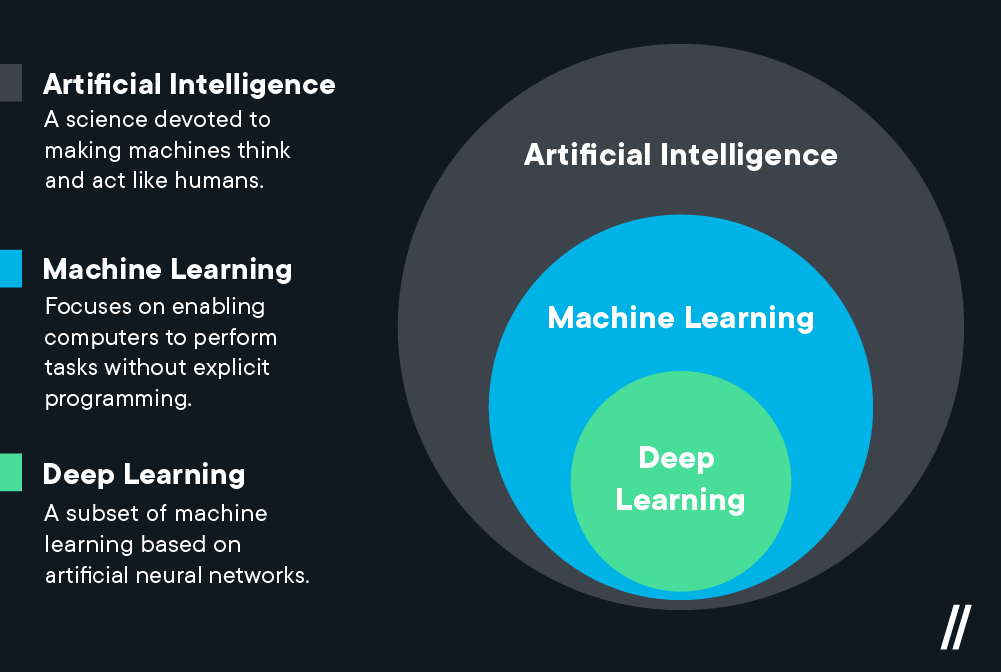

#Neural Network Creation

In [51]:
model = Sequential()
model.add(Dense(500, input_dim=118, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(8, activation='softmax'))

Dropout is a technique where randomly selected neurons are ignored during training, they are “dropped-out” randomly to reduce overfitting. 0.3 creates a dropout layer with a 30% chance of setting inputs to zero.

ReLu is an activation function that returns 0 if it receives any negative input,
but for any positive value x it returns that value back.

Softmax normalizes an input value into a vector of values that follows a probability distribution whose total sums up to 1. The output values are between the range [0,1] which is nice because we are able to avoid binary classification and accommodate as many classes or dimensions in our neural network model.

#Model Compilation

In [ ]:
#model.compile(loss = 'rmse', optimizer = 'adadelta', metrics=['accuracy'])

In [52]:
# Gradient Descent + Adam
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Stochastic Gradient Descent
# model.compile(optimizer=SGD(learning_rate=0.9, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

**Gradient Descent:** An algorithm that changes the internal variables a bit at a time to gradually reduce the loss function.


**Learning Rate / Step Size / alpha:** Hyperparameter that controls how far to move in the search space against the gradient each iteration of the algorithm, also called the learning rate.

The “step size” for loss improvement during gradient descent.
Batch: The set of examples used during training of the neural network

**Momentum:** An extension to the gradient descent optimization algorithm that allows the search to build inertia in a direction in the search space and overcome the oscillations of noisy gradients and coast across flat spots of the search space.

It is designed to accelerate the optimization process

A problem with gradient descent is that it can bounce around the search space on optimization problems that have large amounts of curvature or noisy gradients, and it can get stuck in flat spots in the search space that have no gradient.

**Optimizer:** A specific implementation of the gradient descent algorithm. There are many algorithms for this. In this course we will only use the “Adam” Optimizer, which stands for ADAptive with Momentum. It is considered the best-practice optimizer.

**MSE:** Mean squared error, a type of loss function that counts a small number of large discrepancies as worse than a large number of small ones.

#Model Fitting 

In [54]:
model.fit(train_x_scaled, train_y, batch_size=32, epochs=300)

Epoch 1/300
1856/1856 [==============================] - 8s 3ms/step - loss: 1.4468 - accuracy: 0.4739
Epoch 2/300
1856/1856 [==============================] - 6s 3ms/step - loss: 1.3719 - accuracy: 0.5019
Epoch 3/300
1856/1856 [==============================] - 6s 3ms/step - loss: 1.3435 - accuracy: 0.5099
Epoch 4/300
1856/1856 [==============================] - 6s 3ms/step - loss: 1.3215 - accuracy: 0.5208
Epoch 5/300
1856/1856 [==============================] - 6s 3ms/step - loss: 1.2987 - accuracy: 0.5300
Epoch 6/300
1856/1856 [==============================] - 6s 3ms/step - loss: 1.2761 - accuracy: 0.5348
Epoch 7/300
1856/1856 [==============================] - 6s 3ms/step - loss: 1.2564 - accuracy: 0.5435
Epoch 8/300
1856/1856 [==============================] - 6s 3ms/step - loss: 1.2392 - accuracy: 0.5500
Epoch 9/300
1856/1856 [==============================] - 6s 3ms/step - loss: 1.2203 - accuracy: 0.5582
Epoch 10/300
1856/1856 [==============================] - 6s 3ms/step - l

In [56]:
from keras.models import load_model
model.save("network.sav")

INFO:tensorflow:Assets written to: network.sav/assets


https://flatironschool.com/blog/deep-learning-vs-machine-learning

https://levity.ai/blog/difference-machine-learning-deep-learning

https://stats.stackexchange.com/questions/489933/deep-learning-model-for-tabular-data

In [ ]:
# pip install shap

In [ ]:
#import shap

# load your data here, e.g. X and y
# create and fit your model here

# load JS visualization code to notebook
# shap.initjs()

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
# explainer = shap.TreeExplainer(model)
# shap_values = explainer.shap_values(train_x_scaled)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
# shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

# shap.summary_plot(shap_values, train_x_scaled, plot_type="bar")

#Prediction

In [ ]:
pred = model.predict(test_x_scaled)
y = np.argmax(pred, axis=1)+1

In [ ]:
y

In [ ]:
sn.countplot(submission['Response']);

In [ ]:
submission.head()

In [ ]:
submission.Response=y

In [ ]:
submission.head()

In [ ]:
submission.columns

In [ ]:
submission = submission.set_index('Id')

In [ ]:
submission.head()

In [ ]:
submission.to_csv('new_submission.csv')

In [ ]:
submission.head()

In [ ]:
sn.countplot(submission['Response']);